In [1]:
# Do some polarity detection stuff
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

nltk.download('vader_lexicon')

def polarity_tb_score(text: str) -> float:
    # pip install textblob
    return TextBlob(text).sentiment.polarity

def polarity_v_score(text: str) -> float:
    vader = SentimentIntensityAnalyzer()
    return vader.polarity_scores(text)['compound']



[nltk_data] Error loading vader_lexicon: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     unable to get local issuer certificate (_ssl.c:1108)>


In [48]:
s1 = "Chloroquine is a bad drug"
s2 = "Chloroquine is a great drug"
s3 = "Chloroquine is a controversial drug"
s4 = "There is limited data evidence supporting the notion of chloroquine's efficacy"

print(polarity_tb_score(s1))
print(polarity_tb_score(s2))
print(polarity_tb_score(s3))
print(polarity_tb_score(s4))

-0.6999999999999998
0.8
0.55
0.08928571428571429


In [8]:

# Test cases
s1 = "Chloroquine is a bad drug"
s2 = "Chloroquine is a great drug"
res = contra_by_polarity(s1, s2) # expect True

s1 = "More data is needed about chloroquine to make decisions about its efficacy"
s2 = "Studies have shown great success with chloroquine treatment"
res = contra_by_polarity(s1, s2) # expect False

s = "Chloroquine is an effective treatment"
res = is_polar_statement(s) # expect True

s = "Studis about chloroquine have had mixed results"
res = is_polar_statement(s) # expect False

s1 = "chloroquine leads to cardiac arrest"
s2 = "this report shows that adverse cardiac events are associated with chloroquine"
res = is_context_comparable(s1, s2) # expect True

s1 = "chloroquine causes heart problems"
s2 = "chloroquine causes cardiac issues" 
res = is_context_comparable (s1, s2) # expect True

s1 = "chloroquine is an ineffective treatment for COVID-19"
s2 = "chloroquine has associated cardiac problems" 
res = is_context_comparable (s1, s2) # expect False


NameError: name 'contra_by_polarity' is not defined

In [130]:
test = []
names = ['A', 'B', 'C', 'D', 'E']  # Should already come in order!
for i in range(len(names)-1):
    test.append((names[i], names[i+1]))
    
test

[('A', 'B'), ('B', 'C'), ('C', 'D'), ('D', 'E')]

In [ ]:
# Do some plotting stuff

In [165]:
import datetime
import numpy as np

date_str = "02/28/20"

dates = ["02/28/20", "03/28/20", "04/14/20", "06/01/20", "06/04/20"]
date_objs = [datetime.datetime.strptime(date, '%m/%d/%y') for date in dates]
time_diffs = [(d2-d1).days for d1, d2 in zip(date_objs[:-1], date_objs[1:])]
time_diffs.insert(0,0)
x_positions = np.cumsum(time_diffs)/np.sum(time_diffs)
y_positions = list(np.zeros(len(dates)))
positions = list(zip(x_positions, y_positions))
print(positions)

[(0.0, 0.0), (0.29896907216494845, 0.0), (0.4742268041237113, 0.0), (0.9690721649484536, 0.0), (1.0, 0.0)]


In [164]:
listpositions[0]

TypeError: 'zip' object is not subscriptable

In [169]:
def dates_to_proportions(dates, date_format='%m/%d/%y'):

    date_objs = [datetime.datetime.strptime(date, date_format) for date in dates]
    time_diffs = [(d2-d1).days for d1, d2 in zip(date_objs[:-1], date_objs[1:])]
    time_diffs.insert(0,0)
    proportions = list(np.cumsum(time_diffs)/np.sum(time_diffs))

    return proportions
    
dates = ["02/28/20", "03/28/20", "04/14/20", "06/01/20", "06/04/20"]
x_positions = dates_to_proportions(dates)
y_positions = list(np.zeros(len(dates)))
positions = list(zip(x_positions, y_positions))
print(positions)

[(0.0, 0.0), (0.29896907216494845, 0.0), (0.4742268041237113, 0.0), (0.9690721649484536, 0.0), (1.0, 0.0)]


In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Graph data
names = ['A', 'B', 'C', 'D', 'E']  # Should already come in order!
#positions = [(0, 0), (1, 0), (1.5, 0), (3, 0), (3.2415, 0)]
dates = ["02/28/20", "03/28/20", "04/14/20", "06/01/20", "06/04/20"]
paper_titles = ["title1", "title2", "title3", "title4", "title5"]
edges_comparisons = [('A', 'C'), ('A', 'E'), ('B', 'D')]
edges_comparisons_colors = ["green", "red", "green"]
drug = "chloroquine"

def dates_to_proportions(dates, date_format='%m/%d/%y'):

    date_objs = [datetime.datetime.strptime(date, date_format) for date in dates]
    time_diffs = [(d2-d1).days for d1, d2 in zip(date_objs[:-1], date_objs[1:])]
    time_diffs.insert(0,0)
    proportions = list(np.cumsum(time_diffs)/np.sum(time_diffs))

    return proportions
    
def make_timeline_plot(names, dates, paper_titles, edges_comparisons, edges_comparisons_colors, drug):
    
    x_positions = dates_to_proportions(dates)
    y_positions = list(np.zeros(len(dates)))
    positions = list(zip(x_positions, y_positions))
    
    
    
    edges_time = []
    for i in range(len(names)-1):
        edges_time.append((names[i], names[i+1]))
        
    
    # Matplotlib figure
    plt.figure('Timeline plot')

    # Create graph
    G = nx.MultiDiGraph(format='png', directed=True)

    for index, name in enumerate(names):
        G.add_node(name, pos=positions[index])

    labels = {}

    layout = dict((n, G.nodes[n]["pos"]) for n in G.nodes())
    nx.draw(G, pos=layout, with_labels=True, node_size=300)
    ax = plt.gca()
    for edge, e_color in zip(edges_comparisons, edges_comparisons_colors):
        ax.annotate("",
                    xy=layout[edge[0]], xycoords='data',
                    xytext=layout[edge[1]], textcoords='data',
                    arrowprops=dict(arrowstyle="->", color=e_color,
                                    shrinkA=10, shrinkB=10,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc3,rad=0.5", mutation_scale=20
                                    ),
                    )
    for edge in edges_time:
        ax.annotate("",
                    xy=layout[edge[0]], xycoords='data',
                    xytext=layout[edge[1]], textcoords='data',
                    arrowprops=dict(arrowstyle="-", color="0.5",
                                    shrinkA=10, shrinkB=10,
                                    patchA=None, patchB=None,
                                    connectionstyle="arc,rad=0.5",
                                    ),
                    )

    for pos, date, title in zip(positions, dates, paper_titles): 
        # NOTE the offsets here are hard coded. This will likely cause errors as we scale to real data. This should be proportional instead probably
        #ax.text(positions[i][0], -.021, s=dates[i], bbox=dict(facecolor='#DDDDDD', edgecolor="#DDDDDD", alpha=1),rotation=90,horizontalalignment='center')
        ax.text(pos[0], -.021, s=date,rotation=90,horizontalalignment='center')
        ax.text(pos[0]+.12, -.021, s=title,rotation=90,horizontalalignment='center')

    plt.title(f"Timeline of comparable claims for {drug}", size = 20)
    plt.show()

In [4]:
make_timeline_plot(names, positions, dates, paper_titles, edges_comparisons, edges_comparisons_colors, drug)

NameError: name 'positions' is not defined

In [170]:
randrange(10)

NameError: name 'randrange' is not defined

In [176]:
from random import randrange
randrange(10)

9

In [1]:
# Now I'm playing with pairing claims

import pandas as pd

df = pd.read_csv("/Users/dnsosa/Downloads/cord_titles_abstracts_conclusions_180720.csv")

In [2]:
sens = list(df.sentence)
cq_sens = [sen for sen in sens if "hloroquine" in sen.lower( )]


['The crisis generated by the COVID-19 pandemic has forced us to confront issues of inequality and health disparities. While considerable efforts are being made to "flatten the curve", it does not negate the damage that has already been done, particularly in the African American community. While the virus is not thought to target specific racial or ethnic groups, we cannot ignore that African Americans have been disproportionately impacted. As we think about getting past this crisis and getting back to "normal", the pandemic provides an opportunity to improve our health system to reduce disparities. In sum, understanding the key biological and psychosocial contributors to the ravishes of COVID-19 in African Americans highlights the need for more vigilance, attention, and efforts to improve health for all.',
 "Asymptomatic and atypical presentations of COVID-19 will continue to present to the ED as the number of COVID-19 cases rise. The patient described in this case report was not demo

In [3]:
len(cq_sens)

1971

In [4]:
cq_sens

['Background The severe acute respiratory syndrome coronavirus 2 (SARS-CoV-2) emerged in December 2019 causing the coronavirus disease (COVID-19) pandemic. Currently, there is a lack of evidence-based therapies to prevent COVID-19 following exposure to the virus, or to prevent worsening of symptoms following confirmed infection. We describe the design of a clinical trial of hydroxychloroquine for post-exposure prophylaxis (PEP) and pre-emptive therapy (PET) for COVID-19. Methods We will conduct two nested multicentre international double-blind randomized placebo-controlled clinical trials of hydroxychloroquine for: 1) PEP of asymptomatic household contacts or healthcare workers exposed to COVID-19 within the past four days, and 2) PET for symptomatic outpatients with COVID-19 showing symptoms for less than four days. We will recruit 1,500',
 'Hydroxychloroquine has garnered unprecedented attention as a potential therapeutic option in the global COVID-19 pandemic. 39 Several in vitro an

In [5]:
df_cq = df[df['sentence'].str.contains('hloroquine')]

In [6]:
df_cq

,Unnamed: 0,cord_uid,sentence,section
79,448,60qw00zc,Background The severe acute respiratory syndro...,Abstract
80,487,60qw00zc,Hydroxychloroquine has garnered unprecedented ...,Discussion
81,488,60qw00zc,"Recently, several public figures have promoted...",Discussion
125,713,04czoarc,"Even more concerning, in our review we only id...",Discussion
129,723,rhd0qqyn,The spike protein of SARS-CoV-2 binds to respi...,Abstract
...,...,...,...,...
123043,865852,ahh8or3o,Chloroquine and Hydroxychloroquine are anti‐ma...,DISCUSSIONS
123149,866268,x02u7oh0,COVID‐19 treatments that were administered are...,COVID‐19 Treatments and Outcomes ::: Results
123254,866700,6wszpqvx,The 31 large randomised trials described in th...,Discussion
123257,866703,6wszpqvx,The near instant dissemination of information ...,Discussion


In [10]:
import os
import contradictory_claims as cc


In [12]:
ROOT_DIR = "~/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/"
mancon_path = os.path.join(ROOT_DIR, 'input/manconcorpus-sent-pairs/manconcorpus_sent_pairs_200516.tsv')
mancon = cc.data.make_dataset.load_mancon_corpus_from_sent_pairs(mancon_path)

Number of contradiction pairs: 728
Number of entailment pairs: 1966
Number of neutral pairs: 15217


In [367]:
med_dir = "/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/input/mednli"
meda, medb, medc, medd = cc.data.make_dataset.load_med_nli(os.path.join(med_dir, "mli_train_v1.jsonl"),
                                           os.path.join(med_dir, "mli_dev_v1.jsonl"),
                                           os.path.join(med_dir, "mli_test_v1.jsonl"))




In [368]:
print(len(meda))
print(len(medb))
print(len(medc))
print(len(medd))

12627
12627
1422
1422


In [369]:
print(len(mula))
print(len(mulb))
print(len(mulc))
print(len(muld))

391165
391165
9897
9897


In [366]:
multi_train = "/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/input/multinli"
multi_test = "/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/input/multinli-dev"
mula, mulb, mulc, muld = cc.data.make_dataset.load_multi_nli(os.path.join(multi_train, "multinli_1.0_train.txt"),
                                           os.path.join(multi_test, "multinli_1.0_dev_matched.txt"))




b'Skipping line 24810: expected 15 fields, saw 16\nSkipping line 33961: expected 15 fields, saw 16\n'
b'Skipping line 75911: expected 15 fields, saw 16\nSkipping line 100114: expected 15 fields, saw 16\n'
b'Skipping line 150638: expected 15 fields, saw 16\nSkipping line 158834: expected 15 fields, saw 16\nSkipping line 173104: expected 15 fields, saw 16\nSkipping line 178252: expected 15 fields, saw 16\n'
b'Skipping line 221951: expected 15 fields, saw 16\n'
b'Skipping line 286845: expected 15 fields, saw 16\nSkipping line 314110: expected 15 fields, saw 16\n'


In [30]:
mancon[0]

array(['[CLS]The reduction in hospitalizations, costs, and other resource use achieved using standardized telephonic case management in the early months after a heart failure admission is greater than that usually achieved with pharmaceutical therapy and comparable with other disease management approaches.[SEP]Among adults diagnosed with heart failure who had no prior statin use, incident statin use was independently associated with lower risks of death and hospitalization among patients with or without coronary heart disease.',
       '[CLS]Moderate consumption of fatty fish (1-2 servings per week) and marine omega-3 fatty acids were associated with a lower rate of first HF hospitalization or death in this population.[SEP]The present findings suggest that the C allele at nucleotide -778 in the apoM gene is a risk factor for genetic susceptibility to CAD and is also associated with TC levels in Han Chinese.',
       "[CLS]Each of 3 mutations (-786TC, -922AG, or -1468TA) in the 5'-flank

In [314]:
df_adc = pd.read_csv("/Users/dnsosa/Downloads/drug_individual_claims_filtered_200620.csv") #3735 claims
drug_sens = list(set(df_adc["text1"].values))

NN = 15217
new_as = []
new_bs = []
for _ in range(NN):
    i, j = random.sample(range(len(drug_sens)), 2)
    new_as.append(drug_sens[i])
    new_bs.append(drug_sens[j])
    


In [315]:
d = {'label': ["neutral"]*len(new_as), 'text_a': new_as, 'text_b': new_bs}
df_adc2 = pd.DataFrame(data=d)
df_adc2.head()

,label,text_a,text_b
0,neutral,two recent papers stress the importance of a c...,"our finding that enoxaparin, a partially depol..."
1,neutral,"if leptin indeed plays a crucial role, medicat...","in the ami group, in addition to antiviral and..."
2,neutral,statin (categorised to include other cholester...,"serendipitously, unfractionated heparin also i..."
3,neutral,even patients with covid‐19 may only have the ...,cases of liver damage or dysfunction (mainly c...
4,neutral,convalescent plasma collected from recovered p...,this was the first case of covid-19 as communi...


In [371]:
len(drug_sens)

3735

In [319]:
mancon_data = pd.read_csv(mancon_path, sep='\t')
mancon_data = mancon_data.drop(['guid'], axis=1)
#print(mancon_data.head())
# NOW adding new data
mancon_data = pd.concat([mancon_data, df_adc2])
mancon_data["polarity_a"] = mancon_data.apply(lambda row : polarity_tb_score(row['text_a']), axis = 1)
mancon_data["polarity_b"] = mancon_data.apply(lambda row : polarity_tb_score(row['text_b']), axis = 1) 
mancon_data["max_abs_polarity"] = mancon_data[["polarity_a", "polarity_b"]].max(axis=1).abs()
mancon_data["true_polar"] = mancon_data['label'].str.contains(regstr)

mancon_data.head()

,label,text_a,text_b,polarity_a,polarity_b,max_abs_polarity,true_polar
0,contradiction,Combined clopidogrel and aspirin overcome sing...,The observed trend toward higher patency rates...,0.214286,0.2500,0.250000,True
1,contradiction,Combined clopidogrel and aspirin overcome sing...,"compared with aspirin monotherapy, the combina...",0.214286,-0.1875,0.214286,True
2,contradiction,This pilot study confirms a high rate of graft...,The observed trend toward higher patency rates...,0.260833,0.2500,0.260833,True
3,contradiction,This pilot study confirms a high rate of graft...,"compared with aspirin monotherapy, the combina...",0.260833,-0.1875,0.260833,True
4,contradiction,Aspirin plus clopidogrel is more effective in ...,The observed trend toward higher patency rates...,0.275000,0.2500,0.275000,True


In [266]:
# #SIF with FSE
# import gensim.downloader as api
# from fse import SplitIndexedList
# 
# import os, ssl
# if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
#     ssl._create_default_https_context = ssl._create_unverified_context
# 
# 
# import logging
# logging.basicConfig(format='%(asctime)s : %(threadName)s : %(levelname)s : %(message)s', level=logging.INFO)
# 
# glove = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


2020-08-23 14:57:58,778 : MainThread : INFO : glove-wiki-gigaword-100 downloaded
2020-08-23 14:57:58,782 : MainThread : INFO : loading projection weights from /Users/dnsosa/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz
2020-08-23 14:58:37,576 : MainThread : INFO : loaded (400000, 100) matrix from /Users/dnsosa/gensim-data/glove-wiki-gigaword-100/glove-wiki-gigaword-100.gz


In [181]:
from fse.models.average import FAST_VERSION, MAX_WORDS_IN_BATCH
from fse.models import uSIF

sentences = list(mancon_data.text_a.values)
print(len(mancon_data.text_a.values))
sentences.extend(list(mancon_data.text_b.values))
#s = IndexedList(sentences*8)
s = SplitIndexedList(sentences)
print(len(s))
# NOTE, MANY repeats

print(MAX_WORDS_IN_BATCH)
print(FAST_VERSION) #uh oh...

model = uSIF(glove, workers=2, lang_freq="en")
model.train(s)

NameError: name 'mancon_data' is not defined

In [182]:
print(model.sv.similarity(0,35821).round(3))

NameError: name 'model' is not defined

In [183]:
sent_sims = []
for i in range(len(mancon_data.text_a.values)):
    sim = model.sv.similarity(i, i+len(mancon_data.text_a.values))
    sent_sims.append(sim)
    
mancon_data["uSIF_sims"] = sent_sims
mancon_data["uSIF_sims"] = mancon_data["uSIF_sims"].abs()

NameError: name 'mancon_data' is not defined

In [329]:
mancon_data

,label,text_a,text_b,polarity_a,polarity_b,max_abs_polarity,true_polar,uSIF_sims
0,contradiction,Combined clopidogrel and aspirin overcome sing...,The observed trend toward higher patency rates...,0.214286,0.250000,0.250000,True,0.231235
1,contradiction,Combined clopidogrel and aspirin overcome sing...,"compared with aspirin monotherapy, the combina...",0.214286,-0.187500,0.214286,True,0.583587
2,contradiction,This pilot study confirms a high rate of graft...,The observed trend toward higher patency rates...,0.260833,0.250000,0.260833,True,0.221586
3,contradiction,This pilot study confirms a high rate of graft...,"compared with aspirin monotherapy, the combina...",0.260833,-0.187500,0.260833,True,0.510192
4,contradiction,Aspirin plus clopidogrel is more effective in ...,The observed trend toward higher patency rates...,0.275000,0.250000,0.275000,True,0.404025
...,...,...,...,...,...,...,...,...
15212,neutral,"moreover, the study describes the high possibi...","36 37 in addition, the key sequence of sars-co...",0.160000,0.125000,0.160000,False,0.113846
15213,neutral,interferon β has consistently been shown to be...,large single doses are very dangerous because ...,0.205556,-0.068889,0.205556,False,0.006184
15214,neutral,"so far, both rna vaccine in the united states ...",it can be seen that m396 in this hypothetical ...,0.100000,0.000000,0.100000,False,0.206066
15215,neutral,acute hypoxemic respiratory failure (arf) is c...,the present study provides evidence that host ...,0.141667,0.000000,0.141667,False,0.051819


In [355]:
mancon_data["combined"] = mancon_data["uSIF_sims"] * (mancon_data["max_abs_polarity"] > .05)

In [344]:
mancon_data

,label,text_a,text_b,polarity_a,polarity_b,max_abs_polarity,true_polar,uSIF_sims,combined
0,contradiction,Combined clopidogrel and aspirin overcome sing...,The observed trend toward higher patency rates...,0.214286,0.250000,0.250000,True,0.231235,0.231235
1,contradiction,Combined clopidogrel and aspirin overcome sing...,"compared with aspirin monotherapy, the combina...",0.214286,-0.187500,0.214286,True,0.583587,0.583587
2,contradiction,This pilot study confirms a high rate of graft...,The observed trend toward higher patency rates...,0.260833,0.250000,0.260833,True,0.221586,0.221586
3,contradiction,This pilot study confirms a high rate of graft...,"compared with aspirin monotherapy, the combina...",0.260833,-0.187500,0.260833,True,0.510192,0.510192
4,contradiction,Aspirin plus clopidogrel is more effective in ...,The observed trend toward higher patency rates...,0.275000,0.250000,0.275000,True,0.404025,0.404025
...,...,...,...,...,...,...,...,...,...
15212,neutral,"moreover, the study describes the high possibi...","36 37 in addition, the key sequence of sars-co...",0.160000,0.125000,0.160000,False,0.113846,0.113846
15213,neutral,interferon β has consistently been shown to be...,large single doses are very dangerous because ...,0.205556,-0.068889,0.205556,False,0.006184,0.006184
15214,neutral,"so far, both rna vaccine in the united states ...",it can be seen that m396 in this hypothetical ...,0.100000,0.000000,0.100000,False,0.206066,0.000000
15215,neutral,acute hypoxemic respiratory failure (arf) is c...,the present study provides evidence that host ...,0.141667,0.000000,0.141667,False,0.051819,0.051819


<AxesSubplot:xlabel='max_abs_polarity'>

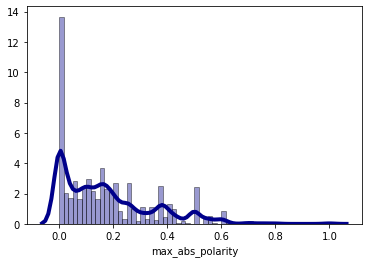

In [354]:
import seaborn as sns
sns.distplot(mancon_data.max_abs_polarity, hist=True, kde=True, 
             bins=int(300/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [243]:
print(mancon_data[mancon_data["label"] == "neutral"]["label"].count())
print(mancon_data[mancon_data["label"] == "entailment"]["label"].count())
print(mancon_data[mancon_data["label"] == "contradiction"]["label"].count())

15217
1966
728


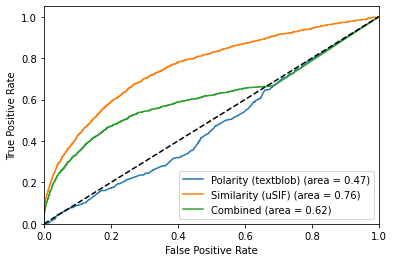

In [356]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier


fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(mancon_data["true_polar"].values, mancon_data["max_abs_polarity"].values)
roc_auc[0] = auc(fpr[0], tpr[0])
fpr[1], tpr[1], _ = roc_curve(mancon_data["true_polar"].values, mancon_data["uSIF_sims"].values)
roc_auc[1] = auc(fpr[1], tpr[1])
fpr[2], tpr[2], _ = roc_curve(mancon_data["true_polar"].values, mancon_data["combined"].values)
roc_auc[2] = auc(fpr[2], tpr[2])


# Plot ROC curve
plt.figure()
plt.plot(fpr[0], tpr[0], label=f'Polarity (textblob) (area = {roc_auc[0]:0.2f})')
plt.plot(fpr[1], tpr[1], label=f'Similarity (uSIF) (area = {roc_auc[1]:0.2f})')
plt.plot(fpr[2], tpr[2], label=f'Combined (area = {roc_auc[2]:0.2f})')


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [222]:
import random

text_a_random = []
text_b_random = []

N = len(mancon_data)
for n in range(N):
    
    i = random.randrange(len(mancon_data))
    text_a_random.append(mancon_data.text_a[i])
    j = random.randrange(len(mancon_data))
    text_b_random.append(mancon_data.text_b[i])
    
mancon_new = pd.DataFrame(text_a_random)


In [220]:
["yes"]*3

['yes', 'yes', 'yes']

In [223]:
mancon_new = pd.DataFrame(label = ["neutral"]*3, guid = None, text_a = text_a_random, text_b = text_b_random)

TypeError: __init__() got an unexpected keyword argument 'label'

In [24]:
model_dir = "/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/trained_models_from_sherlock/biomed_roberta/16-8-2020_18_3_RI367/"
pickle_path = os.path.join(model_dir, "sigmoid.pickle")
trained_model = cc.models.train_model.load_model(pickle_path = pickle_path, transformer_dir = model_dir)

All model checkpoint weights were used when initializing TFRobertaModel.

All the weights of TFRobertaModel were initialized from the model checkpoint at /Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/trained_models_from_sherlock/biomed_roberta/16-8-2020_18_3_RI367/.
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFRobertaModel for predictions without further training.


In [25]:
type(trained_model)

tensorflow.python.keras.engine.training.Model

In [34]:
import numpy as np
from transformers import AutoTokenizer

model_name = "allenai/biomed_roberta_base"
model_name = "deepset/covid_bert_base"

tokenizer = AutoTokenizer.from_pretrained(model_name)
encoded_inputs = regular_encode(inputs, tokenizer, maxlen=max_len)
predictions = model.predict(encoded_inputs)

NameError: name 'model_name' is not defined

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(df_cq.sentence.values.astype('U'))

LDA = LatentDirichletAllocation(n_components=25, random_state=42)
LDA.fit(doc_term_matrix)

for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')
    
topic_values = LDA.transform(doc_term_matrix)
df_cq["LDA_topic"] = topic_values.argmax(axis=1)


Top 10 words for topic #0:
['trials', 'sars', 'clinical', 'hydroxychloroquine', 'cov', 'patients', 'drugs', 'liver', '19', 'covid']


Top 10 words for topic #1:
['coronavirus', 'disease', 'hcq', 'chloroquine', 'drugs', 'treatment', 'trials', 'clinical', 'covid', '19']


Top 10 words for topic #2:
['receptor', 'angiotensin', 'used', 'use', 'covid', '19', 'drugs', 'drug', 'hydroxychloroquine', 'ace2']


Top 10 words for topic #3:
['19', 'viral', 'use', 'results', 'azithromycin', 'clinical', 'treatment', 'study', 'patients', 'hydroxychloroquine']


Top 10 words for topic #4:
['antiviral', 'lopinavir', 'ritonavir', 'severe', 'treatment', 'therapy', 'il', 'covid', '19', 'patients']


Top 10 words for topic #5:
['holder', 'levels', '2020', 'treatment', 'doi', 'studies', 'preprint', 'patients', 'hcq', 'hydroxychloroquine']


Top 10 words for topic #6:
['site', 'residues', 'figure', 'cov', 'azithromycin', 'treatment', 'sars', '19', 'covid', 'hydroxychloroquine']


Top 10 words for topic #7:
['

In [83]:
num_LDA_topics = 25
min_polarity = .5

df_cq["polarity"] = df_cq.apply(lambda row : polarity_tb_score(row['sentence']), axis = 1) 

for k in range(num_LDA_topics):
    df_topic = df_cq[df_cq['LDA_topic'] == k].reset_index()
    print(len(df_topic))
    for i in range(len(df_topic)-1):
        for j in range(i+1, len(df_topic)):
            if abs(df_topic.loc[i,"polarity"]) >= min_polarity and abs(df_topic.loc[j,"polarity"]) >= min_polarity:
                print("Found one!")
                print(df_topic.loc[i,"sentence"])
                print(df_topic.loc[j,"sentence"])
                print("=======")
        

<ipython-input-83-1b68c3d1dc3e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cq["polarity"] = df_cq.apply(lambda row : polarity_tb_score(row['sentence']), axis = 1)


40
177
Found one!
To solve the COVID-19 pandemic, it is urgently required to find effective pharmacological agents. Hydroxychloroquine is a repositioning candidate, still with reports of unclear efficacy and safety issue when used for the treatment of COVID-19.
According to the WHO, more than 20 medicines are used to treat COVID-19 patients with 24 clinical trials. However, treatment with hydroxychloroquine-azithromycin had shown excellent improvement in patients with COVID-19. To confirm the results, we required more comprehensive studies with a large number of patients.[5]
40
123
112
49
38
112
Found one!
The COVID-19 treatments with the most risk for co-administration with antipsychotics are chloroquine, hydroxychloroquine, azithromycin, and lopinavir/ritonavir.
Notably, reports have suggested that both azithromycin and hydroxychloroquine are associated with QT prolongation, and their combined use may potentiate this adverse effect [30, 31] .
43
160
Found one!
There is an urgent need

In [299]:
df = pd.read_csv("/Users/dnsosa/Downloads/cord_titles_abstracts_conclusions_180720.csv")

In [300]:
len(df)

123372

In [302]:
df.sentence.values[0]

'The crisis generated by the COVID-19 pandemic has forced us to confront issues of inequality and health disparities. While considerable efforts are being made to "flatten the curve", it does not negate the damage that has already been done, particularly in the African American community. While the virus is not thought to target specific racial or ethnic groups, we cannot ignore that African Americans have been disproportionately impacted. As we think about getting past this crisis and getting back to "normal", the pandemic provides an opportunity to improve our health system to reduce disparities. In sum, understanding the key biological and psychosocial contributors to the ravishes of COVID-19 in African Americans highlights the need for more vigilance, attention, and efforts to improve health for all.'

In [96]:
num_claims_dist = df.groupby('cord_uid').count().sentence.values

In [ ]:
#num_zeros = ???

In [112]:
#test = np.array([1,2,3])
#test = np.append(test, np.zeros(5))
#print(test)

[1. 2. 3. 0. 0. 0. 0. 0.]


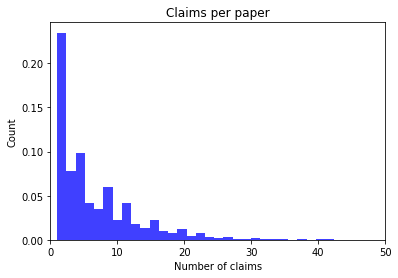

In [113]:
import numpy as np
import matplotlib.pyplot as plt
n, bins, patches = plt.hist(num_claims_dist, 200, density=True, facecolor='b', alpha=0.75)


plt.xlabel('Number of claims')
plt.ylabel('Count')
plt.title('Claims per CORD-19 Paper')
plt.xlim(0, 50)
#plt.ylim(0, 0.03)
#plt.grid(True)
plt.show()

# DOES NOT INCLUDE ZERO!!

In [128]:
set(df.section)

{'Solubility ::: Discussions',
 'Impact of COVID-associated delay on cancer outcomes',
 'Disclosure/Conflict of Interest ::: Discussion',
 'COVID-19 VTE/PE Prophylaxis CG ::: DISCUSSION',
 'Data sources and types and linkages with AI ::: Results and discussion',
 'VI. CONCLUSIONS AND FUTURE WORK',
 'Phylogenetic analyses of human novel coronavirus ::: Results and Discussion',
 'Factorial Structure ::: Discussion',
 'Recommendation ::: Pursue collaborative design of data sharing requirements and transmission mechanisms ::: LONG‐TERM OUTCOMES: TOWARD A FRAMEWORK FOR EFFICIENT TRANSMISSION DYNAMICS',
 'outcome',
 'VI. Discussion',
 'IV. -Discussion',
 'Type of olfactory loss ::: Discussion',
 'South Asia ::: Concurrent multi-hazard cascades during the COVID-19 crisis ::: Discussion',
 'Strengths and Limitations ::: 4. Discussion',
 'Preoperative COVID-19 testing in pediatric patients ::: Discussion',
 'ORF8 is a fast-evolving protein in SARS-related CoVs ::: Results and discussion',
 '3.5

In [117]:
df.head(100)


,Unnamed: 0,cord_uid,sentence,section
0,17,dwrazfli,The crisis generated by the COVID-19 pandemic ...,Conclusions
1,22,5k0ktboh,Asymptomatic and atypical presentations of COV...,Discussion
2,23,5k0ktboh,The patient's radiological findings were enoug...,Discussion
3,24,5k0ktboh,The atypical presentation and lack of communic...,Discussion
4,25,5k0ktboh,Asymptomatic and atypical presentations of COV...,Conclusion
...,...,...,...,...
95,550,yj2hfc0z,We cannot comment on the risk of transmission ...,Discussion
96,551,yj2hfc0z,Topical povidone-iodine is virucidal with in v...,Discussion
97,552,yj2hfc0z,There may be concern that the aerosol generate...,Discussion
98,553,yj2hfc0z,Phacoemulsification cataract surgery occurs in...,Discussion


In [132]:
test = df.groupby('section').count()
test

,Unnamed: 0,cord_uid,sentence
section,,,
Conclusion,3,3,3
"""HPI-Outcome postulates"" and its associated model for deep COVID-19 study",1,1,1
' CONCLUSION,16,16,16
' CONCLUSIONS,1,1,1
' DISCUSSION,13,13,13
...,...,...,...
■ CONCLUSIONS AND PROSPECTS,2,2,2
■ DISCUSSION,4,4,4
■ OUTCOMES OF THE EXPERIMENT,3,3,3


In [ ]:
# ['conclusion',
    #                 'discussion',
    #                 'interpretation',
    #                 'added value of this study',
    #                 'research in context',
    #                 'concluding',
    #                 'closing remarks',
    #                 'summary of findings',
    #                 'outcome']

In [134]:
test.index[1]

'"HPI-Outcome postulates" and its associated model for deep COVID-19 study'

In [146]:
normalized_section = []
for i in range(len(df)):
    section = df.section[i]
    title_subs = ["title"]
    abst_subs = ["abstract"]
    conc_subs = ["conclu", "discuss", "interpret", "added", "value", "context", "closing", "summary", "findings", "outcome"]
    if any(conc_sub in section.lower() for conc_sub in conc_subs):
        normalized_section.append("Conclusion")
    elif any(abst_sub in section.lower() for abst_sub in abst_subs):
        normalized_section.append("Abstract")
    elif any(title_sub in section.lower() for title_sub in title_subs):
        normalized_section.append("Title")
    else: 
        print(f"No match to: -----{section.lower()}-----")


In [149]:
df["normalized_section"] = normalized_section

In [153]:
test2 = df.groupby("normalized_section").count()
test2

,Unnamed: 0,cord_uid,sentence,section
normalized_section,,,,
Abstract,15254,15254,15254,15254
Conclusion,108108,108108,108108,108108
Title,10,10,10,10


In [142]:
test["normalized_section"] = normalized_section
test.head(100)

,Unnamed: 0,cord_uid,sentence,normalized_section
section,,,,
Conclusion,3,3,3,Conclusion
"""HPI-Outcome postulates"" and its associated model for deep COVID-19 study",1,1,1,Conclusion
' CONCLUSION,16,16,16,Conclusion
' CONCLUSIONS,1,1,1,Conclusion
' DISCUSSION,13,13,13,Conclusion
...,...,...,...,...
3.1. Diffusion Model of COVID-19 ::: 3. Results and Discussion,4,4,4,Conclusion
3.1. Enrichr-Guided Gene Set Enrichment Analyses (GSEA) of Genomic Features Associated with the ACE2 and FURIN Genes ::: 3. Results and Discussion,5,5,5,Conclusion
3.1. Identifying the Temporal Patterns of Daily New Confirmed Cases ::: 3. Results and Discussion,5,5,5,Conclusion


In [144]:
test2 = test.groupby('normalized_section').count()
test2

,Unnamed: 0,cord_uid,sentence
normalized_section,,,
Abstract,8,8,8
Conclusion,5785,5785,5785
Title,1,1,1


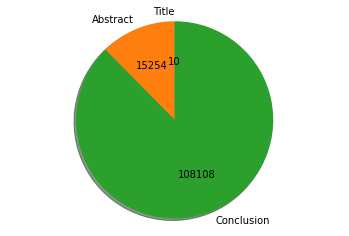

In [173]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Title', 'Abstract', 'Conclusion'
sizes = [10, 15254, 108108]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

plt.rcParams.update({'font.size': 10})


fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct=lambda pct: round(pct*sum(sizes)/100), shadow=True, startangle=90, labeldistance=1.1)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


In [180]:
os.getcwd()

'/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/drug-lit-contradictory-claims/notebooks'

In [182]:
# Functionality for swapping out the gold standard labels
root_dir = os.path.join(os.getcwd(), os.path.join( "../")) # MIGHT NEED TO CHANGE LATER
input_dir = os.path.join(root_dir, "input")
roam_path = os.path.join(input_dir, "Demo-Annotations-R1-2020-08-21.xlsx")
active_sheet = "Docs"
roam = pd.read_excel(roam_path, sheet_name=active_sheet)

In [191]:
test = "Claim1: \n\nThis is a test.\n\nClaim2:\n\nAnother test.\n\n"
text1 = test.rstrip().split("\n\n")[1]
text2 = test.rstrip().split("\n\n")[3]
print(text1)
print(text2)


This is a test.
Another test.


In [194]:
def splitter(in_str, index):
    text1 = in_str.rstrip().split("\n\n")[index]
    return text1

In [203]:
roam["text1"] = roam.text.transform(lambda x: splitter(x, 1))
roam["text2"] = roam.text.transform(lambda x: splitter(x, 3))
roam["annotation"] = roam.tags.transform(lambda x: x.lower())
# TO DO: Don't forget about the STRICTs!

In [204]:
roam.head()

,docnum,tags,source,text,paper1_cord_uid,paper2_cord_uid,text1,text2,annotation
0,0,ENTAILMENT,Demo-Annotations_43573ac3-R1,Claim1:\n\nour findings reveal that nelfinavir...,662pfa61,zgdbvfi4,our findings reveal that nelfinavir is highly ...,nelfinavir was predicted to be a potential inh...,entailment
1,1,CONTRADICTION,Demo-Annotations_43573ac3-R1,Claim1:\n\nthese results suggest that nelfinav...,662pfa61,h4cu63cm,"these results suggest that nelfinavir, lopinav...",whether combining lopinavir ritonavir with oth...,contradiction
2,2,ENTAILMENT,Demo-Annotations_43573ac3-R1,Claim1:\n\nfavorable changes of ct findings in...,7szz88q0,pobmam24,favorable changes of ct findings in a patient ...,tocilizumab treatment in severe covid-19 patie...,entailment
3,3,ENTAILMENT,Demo-Annotations_43573ac3-R1,"Claim1:\n\nin conclusion, we found that lopina...",h4cu63cm,n6l2804j,"in conclusion, we found that lopinavir ritonav...",overall our results emphasize that the pk/pd p...,entailment
4,4,ENTAILMENT,Demo-Annotations_43573ac3-R1,Claim1:\n\narguments in favour of remdesivir f...,9hxihlw9,x50tvq3a,arguments in favour of remdesivir for treating...,"our results, together with replication inhibit...",entailment


In [207]:
roam_out = roam[["paper1_cord_uid", "paper2_cord_uid", "text1", "text2", "annotation"]]
new_roam_path = os.path.join(input_dir, "Demo-Annotations-R1-2020-08-21_REFORMATTED.xlsx")
roam_out.to_excel(new_roam_path)

16-8-2020_18_3_RI367

,Unnamed: 0,cord_uid,sentence,section
0,17,dwrazfli,The crisis generated by the COVID-19 pandemic ...,Conclusions
1,22,5k0ktboh,Asymptomatic and atypical presentations of COV...,Discussion
2,23,5k0ktboh,The patient's radiological findings were enoug...,Discussion
3,24,5k0ktboh,The atypical presentation and lack of communic...,Discussion
4,25,5k0ktboh,Asymptomatic and atypical presentations of COV...,Conclusion


In [373]:
# This section is dedicated to filtering claims from drug_individual_claims_filtered

df_adc.head()

,Unnamed: 0,paper1_cord_uid,paper2_cord_uid,text1,text2,similarity_score,drugs1,drugs2,publish_time1,title1,publish_time2,title2
0,0,02q9y011,11060ijh,although 26% of the amino acids in this sars-c...,the results show that the 17 organosulfur comp...,0.838402,amino acids,amino acids,2020-04-29,Molecular Basis for ADP-ribose Binding to the ...,2020-03-31,Investigation into SARS-CoV-2 Resistance of Co...
1,1,02q9y011,8y9gaoqb,although 26% of the amino acids in this sars-c...,these orfs contain the first 200-800 amino aci...,0.867557,amino acids,amino acids,2020-04-29,Molecular Basis for ADP-ribose Binding to the ...,2020-04-29,Noncanonical junctions in subgenomic RNAs of S...
2,2,0hrmk77p,8y9gaoqb,"these summary findings are important, as it wi...","finally, we show that currently unannotated or...",0.632174,"chloroquine,corticosteroids,lopinavir,oseltami...",amino acids,2020-04-03,COVID-19 infection during pregnancy: A systema...,2020-04-29,Noncanonical junctions in subgenomic RNAs of S...
3,3,0hrmk77p,8y9gaoqb,"nevertheless, this study still important and w...","finally, we show that currently unannotated or...",0.627999,"chloroquine,corticosteroids,lopinavir,oseltami...",amino acids,2020-04-03,COVID-19 infection during pregnancy: A systema...,2020-04-29,Noncanonical junctions in subgenomic RNAs of S...
4,4,0wpzsmoy,8y9gaoqb,both rabbit and gp ventricles have dofetilide-...,"finally, we show that currently unannotated or...",0.677273,dofetilide,amino acids,2020-05-29,Fatal arrhythmias: Another reason why doctors ...,2020-04-29,Noncanonical junctions in subgenomic RNAs of S...


In [440]:
drug_list = ["azithromycin", "barcitinib", "chloroquine", "bortezomib", "buprenorphine", "camostat", "nefamostat", "carfilzomib", "ovir", "ivir", "avir", "evir", "ib", "clonazepam", "clozapine", "cobicistat", "vitamin", "colchicine", "convalescent plasma", "cr30", "emtricitabine", "gs-57", "ino-48", "stat", "mab", "prednisolone"]
print(len(df_adc))
df_filtered = df_adc[df_adc['text1'].str.contains('|'.join(drug_list))]
print(len(df_filtered))
df_filtered = df_filtered[df_filtered['text2'].str.contains('|'.join(drug_list))]
print(len(df_filtered))


660964
571265
539201


In [376]:
df_filtered.head()

,Unnamed: 0,paper1_cord_uid,paper2_cord_uid,text1,text2,similarity_score,drugs1,drugs2,publish_time1,title1,publish_time2,title2
190,190,2t3evpxf,2dtrvxic,"cobicistat, ritonavir, lopinavir, and darunavi...",the tentative agreement of applying drug candi...,0.674526,"cobicistat,darunavir,lopinavir,ritonavir,cobic...","lopinavir,lopinavir,phenol",2020-05-06,Peptide-like and small-molecule inhibitors aga...,2020-05-11,Molecular docking and dynamic simulations for ...
191,191,2t3evpxf,2dtrvxic,"cobicistat, ritonavir, lopinavir, and darunavi...",the rmsd of three complexes fall between 0.15 ...,0.565082,"cobicistat,darunavir,lopinavir,ritonavir,cobic...","lopinavir,lopinavir,phenol",2020-05-06,Peptide-like and small-molecule inhibitors aga...,2020-05-11,Molecular docking and dynamic simulations for ...
192,192,2t3evpxf,2dtrvxic,"cobicistat, ritonavir, lopinavir, and darunavi...",the tentative agreement of applying drug candi...,0.674526,"cobicistat,darunavir,lopinavir,ritonavir,cobic...","lopinavir,lopinavir,phenol",2020-05-06,Peptide-like and small-molecule inhibitors aga...,2020-05-11,Molecular docking and dynamic simulations for ...
193,193,2t3evpxf,2dtrvxic,"cobicistat, ritonavir, lopinavir, and darunavi...",the rmsd of three complexes fall between 0.15 ...,0.565082,"cobicistat,darunavir,lopinavir,ritonavir,cobic...","lopinavir,lopinavir,phenol",2020-05-06,Peptide-like and small-molecule inhibitors aga...,2020-05-11,Molecular docking and dynamic simulations for ...
194,194,2t3evpxf,2dtrvxic,"cobicistat, ritonavir, lopinavir, and darunavi...","the average rmsd values of amodiquine, lopinav...",0.567692,"cobicistat,darunavir,lopinavir,ritonavir,cobic...","lopinavir,amino acids,lopinavir",2020-05-06,Peptide-like and small-molecule inhibitors aga...,2020-05-11,Molecular docking and dynamic simulations for ...


In [386]:
#df_dan = pd.read_csv("/Users/dnsosa/Downloads/v31_Dan_R3_Part1_Master.csv", encoding='utf8') #3735 claims
df_dan = pd.read_excel("/Users/dnsosa/Downloads/v31_Dan_R3_Part1_Master.xlsx", sheet_name="Sheet1") #3735 claims
print(len(df_dan))
df_dan = df_dan[df_dan['drugs1'].str.contains('|'.join(drug_list))]
print(len(df_dan))
df_dan = df_dan[df_dan['drugs2'].str.contains('|'.join(drug_list))]
print(len(df_dan))



6461
2372
1686


In [397]:
def have_common_drug(str1, str2):
    set1 = set(str1.split(","))
    set2 = set(str2.split(","))
    return len(set1.intersection(set2)) != 0

In [398]:
df_dan["common_drugs"] = df_dan.apply(lambda row : have_common_drug(row["drugs1"], row["drugs2"]), axis=1)
#df_dan["uSIF_sims"] = df_dan.apply(lambda row : model.sv.similarity(row["text1"], row[""]))

In [392]:
#sent_sims = []
#for i in range(len(mancon_data.text_a.values)):
#    sim = model.sv.similarity(i, i+len(mancon_data.text_a.values))
#    sent_sims.append(sim)


True

In [402]:
df_dan_processed = df_dan[df_dan["common_drugs"] == True].sort_values("similarity_score", ascending=False)
#model_dir = "/Users/dnsosa/Desktop/AltmanLab/ContradictoryClaims/trained_models_from_sherlock/biomed_roberta/16-8-2020_18_3_RI367/"

In [403]:
df_dan_processed.to_csv("/Users/dnsosa/Downloads/v31_Dan_R3_Part1_Master_PROCESSED.csv")

In [ ]:
# THIS IS WHERE I"M MAKING THE ROAM DATASET

In [2]:
from textblob import TextBlob

def have_common_drug(str1, str2, terrible=True):
    if not terrible:
        set1 = set(str1.split(","))
        set2 = set(str2.split(","))
    else: 
        #set1 = set(str1.split())
        set1 = set([item for item in str1.split() if item.isalnum()])
        set2 = set([item for item in str2.split() if item.isalnum()])
    return len(set1.intersection(set2)) != 0


def polarity_tb_score(text: str) -> float:
    # pip install textblob
    return TextBlob(text).sentiment.polarity

In [3]:
# Load the file

import pandas as pd

df_adc = pd.read_csv("/Users/dnsosa/Downloads/paired_claims_150820.csv")
[item for item in df_adc.drugs1.values[0].split() if item.isalnum()]

['hydroxychloroquine', 'chloroquine']

In [60]:
# Do some polarity detection stuff
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from textblob import TextBlob

#nltk.download('vader_lexicon')

def polarity_tb_score(text: str) -> float:
    # pip install textblob
    return TextBlob(text).sentiment.polarity

def polarity_v_score(text: str) -> float:
    vader = SentimentIntensityAnalyzer()
    return vader.polarity_scores(text)['compound']

In [54]:
#nltk.download()

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context
    
nltk.download("vader_lexicon")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/dnsosa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [59]:
#df_adc[df_adc["text1"].str.contains("no particular efficacy in treating")]
paper1 = "30x26ip7"
paper2 = "5o9bbspc"
p1 = df_filtered[df_filtered["paper1_cord_uid"].str.contains(paper1)]
p2 = p1[p1["paper2_cord_uid"].str.contains(paper2)]
polarity_v_score(p2.text1.values[0])

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [56]:
p2.text1.values[0]

'these results may provide insight into the immunomodulation mechanisms of hydroxychloroquine treatment in the setting of covid-19 and suggest hydroxychloroquine is not a panacea to sars-cov-2 infection.'

In [38]:
for drug in all_drugs:
    if "ib" in drug:
        print(drug)

[' baricitinib ']
 ' fibrinogen ']
 ' acalabrutinib ']
[' nilotinib ']
[' fibrinogen ']
 ' baricitinib ']
 ' carfilzomib ']
[' sorafenib ']
[' ruxolitinib ']
[' celecoxib ']
[' fostamatinib ']
[' fibrinogen '
[' bortezomib '
[' ibuprofen ']
 ' palbociclib ']
 ' sunitinib ']
 ' imatinib ']
[' ribavirin ']
 ' ribavirin ']
[' tofacitinib ']
[' tofacitinib '
 ' ribavirin '
[' sunitinib '
 ' fedratinib ']
 ' erlotinib ']
 ' fibrinogen '
[' imatinib ']
[' palbociclib ']
[' fedratinib ']
[' ibrutinib '
[' ribavirin '
[' ruxolitinib '
 ' ixazomib '


In [39]:
# Filter to specific drugs and remove duplicates

drug_list = ["azithromycin", "barcitinib", "chloroquine", "bortezomib", "buprenorphine", "camostat", "nefamostat", "carfilzomib", "ovir", "ivir", "avir", "evir", "mib", "nib", "lib", "clonazepam", "clozapine", "cobicistat", "vitamin", "colchicine", "convalescent plasma", "cr30", "emtricitabine", "gs-57", "ino-48", "stat", "mab", "prednisolone"]
print(len(df_adc)) #927432
df_filtered = df_adc[df_adc['text1'].str.contains('|'.join(drug_list))]
print(len(df_filtered)) #539768
df_filtered = df_filtered[df_filtered['text2'].str.contains('|'.join(drug_list))]
print(len(df_filtered)) #477976
df_filtered["common_drugs"] = df_filtered.apply(lambda row : have_common_drug(row["drugs1"], row["drugs2"]), axis=1)
print(len(df_filtered[df_filtered["common_drugs"] == 1])) #465387?
df_filtered = df_filtered[df_filtered["common_drugs"]==1]
if len(df_filtered.columns) == 13:
    df_filtered = df_filtered.drop(df_filtered.columns[0], axis=1) # remove dumb column
print(len(df_filtered)) #465387? still
df_filtered = df_filtered.drop_duplicates()
print(len(df_filtered)) #367689
df_filtered.head()

927432
539768
477976
465387
465387
367689


,paper1_cord_uid,paper2_cord_uid,text1,text2,similarity_score,drugs1,drugs2,publish_time1,title1,publish_time2,title2,common_drugs
0,qe56u93a,xsorsrp4,"the review elaborates the mechanism of action,...",the spectrophotometric assay method does not s...,0.597401,"[' hydroxychloroquine ', ' chloroquine ']",[' chloroquine '],2020-05-11,A systematic review on use of aminoquinolines ...,2020-04-29,Concentration-dependent mortality of chloroqui...,True
1,qe56u93a,xsorsrp4,the proposed mechanism of viral inhibition inv...,large single doses are very dangerous because ...,0.788242,"[' chloroquine ', ' chloroquine phosphate ']",[' chloroquine '],2020-05-11,A systematic review on use of aminoquinolines ...,2020-04-29,Concentration-dependent mortality of chloroqui...,True
2,qe56u93a,xsorsrp4,following points can be concluded and to be co...,the high dose chloroquine regimen used by borb...,0.774626,"[' hydroxychloroquine ', ' chloroquine ', ' ka...",[' chloroquine '],2020-05-11,A systematic review on use of aminoquinolines ...,2020-04-29,Concentration-dependent mortality of chloroqui...,True
3,qe56u93a,xsorsrp4,"the review elaborates the mechanism of action,...","thus, given available safety data, is very unl...",0.763151,"[' hydroxychloroquine ', ' chloroquine ']","[' hydroxychloroquine ', ' chloroquine ']",2020-05-11,A systematic review on use of aminoquinolines ...,2020-04-29,Concentration-dependent mortality of chloroqui...,True
4,qe56u93a,xsorsrp4,the recommended dose for chloroquine base is 6...,self-poisoning with chloroquine provides an un...,0.562186,"[' chloroquine ', ' chloroquine phosphate ']",[' chloroquine '],2020-05-11,A systematic review on use of aminoquinolines ...,2020-04-29,Concentration-dependent mortality of chloroqui...,True


In [42]:
# Calculate polarity

df_filtered["polarity_a"] = df_filtered.apply(lambda row : polarity_tb_score(row['text1']), axis = 1)
df_filtered["polarity_b"] = df_filtered.apply(lambda row : polarity_tb_score(row['text2']), axis = 1) 

In [43]:
df_filtered["combined_polarity"] = df_filtered.polarity_a * df_filtered.polarity_b

In [ ]:
# Calculate vader polarity

t1v = set(list(df_filtered.text1.values))
t2v = set(list(df_filtered.text2.values))
tall = list(t1v.union(t2v))
print(len(tall)) #735800

d = {'text': tall}
new_df = pd.DataFrame(data=d)
new_df["polarity_vader"] = new_df.apply(lambda row : polarity_v_score(row['text']), axis = 1)

df_filtered = df_filtered.merge(new_df, left_on='text1', right_on='text')
df_filtered = df_filtered.merge(new_df, left_on='text2', right_on='text')
#df_filtered = df_filtered.drop(['text_x', 'text_y'])

In [84]:
df_filtered["combined_vader_polarity"] = df_filtered.polarity_vader_x * df_filtered.polarity_vader_y

In [94]:
print(len(df_filtered[df_filtered["combined_vader_polarity"] <= 0].sort_values("combined_vader_polarity", ascending = True)))
print(len(df_filtered[df_filtered["combined_vader_polarity"] < 0].sort_values("combined_vader_polarity", ascending = True)))
print(len(df_filtered[df_filtered["combined_vader_polarity"] <= -.5].sort_values("combined_vader_polarity", ascending = True)))

253959
101291
3217


In [110]:
# Group 1 (Entailments)

df_g1 = df_filtered

df_g1 = df_g1[(df_g1.polarity_vader_x.abs() >= .5) & (df_g1.polarity_vader_y.abs() >= .5) & (df_g1.combined_vader_polarity > 0) & (df_g1.similarity_score > 0.6)]
df_g1 = df_g1[df_g1["text1"].str.contains("we |our |this study|this result|these data|these results")] #metadiscourse heuristics
df_g1 = df_g1[df_g1["text2"].str.contains("we |our |this study|this result|these data|these results")]
df_g1 = df_g1.drop_duplicates().sample(n=450)
print(len(df_g1))
#df_g1.sample(n=300).to_excel("~/Downloads/RoamPairs/Group1_sampled_meets_thresholds_WE_0.6_thesedata.xlsx")

# 100 of these

450


In [111]:
# Group 2 (Contradictions)

df_g2 = df_filtered

df_g2 = df_g2[(df_g2.polarity_vader_x.abs() >= .5) & (df_g2.polarity_vader_y.abs() >= .5) & (df_g2.combined_vader_polarity < 0) & (df_g2.similarity_score > 0.6)]
df_g2 = df_g2[df_g2["text1"].str.contains("we |our |this study|this result|these data|these results")] #metadiscourse heuristics
df_g2 = df_g2[df_g2["text2"].str.contains("we |our |this study|this result|these data|these results")]
df_g2 = df_g2.drop_duplicates().sample(n=450)
print(len(df_g2))
#df_g2.to_excel("~/Downloads/RoamPairs/Group2_most_combined_neg.xlsx")



450


In [132]:
# Group 3 (Just similar)

df_g3 = df_filtered

df_g3 = df_g3[df_g3["text1"].str.contains("we |our |this study|this result|these data|these results")] #metadiscourse heuristics
df_g3 = df_g3[df_g3["text2"].str.contains("we |our |this study|this result|these data|these results")]
df_g3['max_similarity'] = df_g3.groupby('text1')['similarity_score'].transform('max')
df_g3 = df_g3[df_g3["similarity_score"] == df_g3["max_similarity"]].drop_duplicates()
df_g3 = df_g3.groupby("text2").sample(n=5, replace=True).drop_duplicates().sample(n=102)
print(len(df_g3))

#df_g3.sample(n=400).to_excel("~/Downloads/RoamPairs/Group3_v2.xlsx")


102


In [133]:
len(pd.concat([df_g1, df_g2, df_g3]).drop_duplicates())

1000

In [136]:
pd.concat([df_g1, df_g2, df_g3]).drop_duplicates().sample(frac=1).to_excel("~/Downloads/RoamPairs/Contradictory_claims_Roam_scaling_round_V2.xlsx")

#Consider changing similarity threshold or polarity threshold


In [66]:
### df_filtered['max_similarity'] = df_filtered.groupby('text1')['similarity_score'].transform('max')
### #df_filtered.head()
### df_filtered_final = df_filtered[df_filtered["similarity_score"] == df_filtered["max_similarity"]].drop(df_filtered.columns[0:2], axis=1).drop_duplicates()
### df_filtered_final["polarity_a"] = df_filtered_final.apply(lambda row : polarity_tb_score(row['text1']), axis = 1)
### df_filtered_final["polarity_b"] = df_filtered_final.apply(lambda row : polarity_tb_score(row['text2']), axis = 1) 
### df_filtered_final["max_abs_polarity"] = df_filtered_final[["polarity_a", "polarity_b"]].max(axis=1).abs()
### print(len(df_filtered_final))

In [9]:
df_filtered["polarity_a"] = df_filtered.apply(lambda row : polarity_tb_score(row['text1']), axis = 1)
df_filtered["polarity_b"] = df_filtered.apply(lambda row : polarity_tb_score(row['text2']), axis = 1) 
##df_filtered = df_filtered[df_filtered["polarity_a"] != 0]
##df_filtered = df_filtered[df_filtered["polarity_b"] != 0]
##print(len(df_filtered))
##df_filtered['max_similarity'] = df_filtered.groupby('text1')['similarity_score'].transform('max')
##df_filtered_final = df_filtered[df_filtered["similarity_score"] == df_filtered["max_similarity"]].drop_duplicates()
##print(len(df_filtered_final))


201231
1366


In [62]:
#df_filtered["polarity_vader_a"] = df_filtered.apply(lambda row : polarity_v_score(row['text1']), axis = 1)
#df_filtered["polarity_vader_b"] = df_filtered.apply(lambda row : polarity_v_score(row['text2']), axis = 1) 

t1v = set(list(df_filtered.text1.values))
t2v = set(list(df_filtered.text2.values))
tall = list(t1v.union(t2v))
print(len(tall)) #735800

d = {'text': tall}
new_df = pd.DataFrame(data=d)
new_df["polarity_vader"] = new_df.apply(lambda row : polarity_v_score(row['text']), axis = 1)

df_filtered = df_filtered.merge(new_df, left_on='text1', right_on='text')
df_filtered = df_filtered.merge(new_df, left_on='text2', right_on='text')
#df_filtered = df_filtered.drop(['text_x', 'text_y'])

KeyboardInterrupt: 

In [66]:
len(df_filtered)

367689

In [ ]:
# TO-Dos

# 1. Find categories via LDA
# 2. Find categories manually
# 3. Implement SIF

In [138]:
df_cq = df[df['sentence'].str.contains('hloroquine')]

AttributeError: 'list' object has no attribute 'astype'

In [175]:
claim_set = hcq_we_claims
num_LDA_topics = 10

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation


count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(claim_set)

LDA = LatentDirichletAllocation(n_components=10, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(random_state=42)

In [169]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')


Top 10 words for topic #0:
['qtc', 'did', 'support', 'chloroquine', 'treatment', 'combination', 'azithromycin', 'patients', '19', 'covid']


Top 10 words for topic #1:
['drug', 'showed', 'previous', 'studies', 'treated', 'suggest', 'findings', 'mortality', 'disease', 'patients']


Top 10 words for topic #2:
['evaluate', 'pandemic', 'used', 'virus', 'chemoprophylaxis', 'analysis', 'role', 'drugs', '19', 'covid']


Top 10 words for topic #3:
['controlled', 'patient', 'azithromycin', 'randomized', 'use', 'covid', '19', 'trials', 'patients', 'results']


Top 10 words for topic #4:
['cqn1b', 'results', 'cqn2h', 'effectively', 'nsp', 'derivatives', 'chloroquine', 'bind', 'mol', 'kcal']


Top 10 words for topic #5:
['provide', 'study', 'early', 'treatment', 'infection', 'patients', 'cov', 'sars', 'covid', '19']


Top 10 words for topic #6:
['preventive', 'strongly', 'trials', 'effects', 'assess', 'progression', 'level', 'performed', 'clinical', 'infection']


Top 10 words for topic #7:
['spec

In [170]:
d = {'text': claim_set}
ind_claims_df = pd.DataFrame(data=d)

In [171]:
topic_values = LDA.transform(doc_term_matrix)
ind_claims_df["LDA_topic"] = topic_values.argmax(axis=1)
ind_claims_df["v_polarity"] = ind_claims_df.apply(lambda row : polarity_v_score(row['text']), axis = 1) 

In [177]:
min_polarity = .5


for k in range(num_LDA_topics):
    df_topic = ind_claims_df[ind_claims_df['LDA_topic'] == k].reset_index()
    print(len(df_topic))
    for i in range(len(df_topic)-1):
        for j in range(i+1, len(df_topic)):
            if abs(df_topic.loc[i,"v_polarity"]) >= min_polarity and abs(df_topic.loc[j,"v_polarity"]) >= min_polarity:
                print("Found one!")
                print(df_topic.loc[i,"text"])
                print(df_topic.loc[j,"text"])
                print("=======")
        

18
Found one!
our study did not allow for discussion of the possible mechanism of action but shows a safety signal with the association hydroxychloroquine + metformin.
our systematic review of clinical studies did not provide substantial evidence to support the treatment benefits of hydroxychloroquine or chloroquine in hospitalized covid-19 patients.
Found one!
our study did not allow for discussion of the possible mechanism of action but shows a safety signal with the association hydroxychloroquine + metformin.
we did not perform a power analysis to calculate sample size that we need to predict the prevalence of significant qt prolongation following hydroxychloroquine and azithromycin combination.
Found one!
our study did not allow for discussion of the possible mechanism of action but shows a safety signal with the association hydroxychloroquine + metformin.
our findings suggest a possible higher risk of death for patients receiving hydroxychloroquine combined with azi.
Found one!
ou

In [179]:
# START HERE!!

In [9]:
#SIF with FSE
import gensim.downloader as api
from fse import SplitIndexedList

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context


import logging
logging.basicConfig(format='%(asctime)s : %(threadName)s : %(levelname)s : %(message)s', level=logging.INFO)

glove = api.load("glove-wiki-gigaword-300")

2020-09-17 14:28:41,049 : MainThread : INFO : loading projection weights from /Users/dnsosa/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz
2020-09-17 14:30:32,064 : MainThread : INFO : loaded (400000, 300) matrix from /Users/dnsosa/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz


In [10]:
glove

In [11]:
import pandas as pd

all_claims_df = pd.read_csv("/Users/dnsosa/Downloads/processed_claims_150820.csv")
all_claims_df = all_claims_df.drop(all_claims_df.columns[0:2], axis=1)
all_claims_df["polarity_vader"] = all_claims_df.apply(lambda row : polarity_v_score(row['claims']), axis = 1)

print(len(all_claims_df))


5565


In [12]:
print(len(all_claims_df))
print(len(all_claims_df[all_claims_df.section == "Conclusion"]))

5565
328


In [13]:
import re

all_claims = all_claims_df.claims.values
all_claims_abs = all_claims_df[all_claims_df.section == "Abstract"].claims.values
all_claims_abs_conc = all_claims_df[(all_claims_df.section == "Abstract") | (all_claims_df.section == "Conclusion")].claims.values
we_claims = [claim for claim in all_claims if re.match("we |our |this study|this result|these data|these results", claim)]
hcq_claims = [claim for claim in all_claims if "hydroxychloroquine" in claim]
hcq_we_claims = [claim for claim in we_claims if "hydroxychloroquine" in claim]
print(len(all_claims))
print(len(all_claims_abs))
print(len(all_claims_abs_conc))
print(len(we_claims))
print(len(hcq_claims))
print(len(hcq_we_claims))




5565
808
1136
507
936
100


In [7]:
specific_drug_list = ["hydroxychloroquine", 
                      " chloroquine", 
                      "tocilizumab", 
                      "convalescent plasma",
                      "ritonavir", 
                      "remdesivir", 
                      "vitamin d", 
                      "nelfinavir",
                      "dexamethasone",
                      "nelfinavir",
                      "lopinavir",
                      "darunavir"]


for drug in specific_drug_list:
    drug_claims = [claim for claim in all_claims if drug in claim]
    drug_we_claims = [claim for claim in we_claims if drug in claim]
    print(drug)
    print(len(drug_claims))
    print(len(drug_we_claims))

hydroxychloroquine
936
100
 chloroquine
378
36
tocilizumab
275
30
convalescent plasma
14
2
ritonavir
194
5
remdesivir
83
4
vitamin d
144
13
nelfinavir
12
6
dexamethasone
85
8
nelfinavir
12
6
lopinavir
193
8
darunavir
16
0


In [14]:
from fse.models.average import FAST_VERSION, MAX_WORDS_IN_BATCH
from fse.models import uSIF

claims = drug_claims
print(len(claims))
#s = IndexedList(sentences*8)
s = SplitIndexedList(claims)
print(len(s))
# NOTE, MANY repeats

print(MAX_WORDS_IN_BATCH)
print(FAST_VERSION) #uh oh...

model = uSIF(glove, workers=2, lang_freq="en")
model.train(s)

2020-09-17 14:35:27,521 : MainThread : INFO : no frequency mode: using wordfreq for estimation of frequency for language: en


16
16
10000
-1


2020-09-17 14:35:27,917 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-17 14:35:27,918 : MainThread : INFO : finished scanning 16 sentences with an average length of 37 and 605 total words
2020-09-17 14:35:28,016 : MainThread : INFO : estimated memory for 16 sentences with 300 dimensions and 400000 vocabulary: 459 MB (0 GB)
2020-09-17 14:35:28,016 : MainThread : INFO : initializing sentence vectors for 16 sentences
2020-09-17 14:35:28,017 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-09-17 14:35:29,173 : MainThread : INFO : begin training
2020-09-17 14:35:29,175 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-09-17 14:35:29,177 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-09-17 14:35:29,195 : MainThread : INFO : computing 5 principal components took 0s
2020-09-17 14:35:29,196 : MainThread : INFO : removing 5 principal components took 0s
2020-09-17 14

(16, 484)

In [233]:
# This one is an example!

#model.sv.similar_by_word("mortality", wv=glove, indexable=s.items)

res_list = model.sv.similar_by_sentence("mortality".split(), model=model, indexable=s.items, topn=1000)
results = list(zip(*res_list)) 
d = {'claim': results[0], 'similarity_to_topic': results[2], 'drug': [drug]*len(results[0]), 'topic': [topic]*len(results[0])}
res_df = pd.DataFrame(data=d)
res_df["polarity_vader"] = res_df.apply(lambda row : polarity_v_score(row['claim']), axis = 1)


2020-09-09 23:34:04,449 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-09 23:34:04,450 : MainThread : INFO : finished scanning 1 sentences with an average length of 1 and 1 total words
2020-09-09 23:34:04,451 : MainThread : INFO : removing 5 principal components took 0s


In [28]:
non_claim_list = ['objectives: in this study, we investigate the effect of hydroxychloroquine on the prevention of novel coronavirus disease in cancer patients being treated.', 'exclusion criteria include previous infection with sars cov2 (positive sars-cov-2 pcr or igg serology), pregnancy or lactation, any contraindication to hydroxychloroquine or evidence of unstable or clinically significant systemic disease.', 'following the demonstration of the efficacy of hydroxychloroquine against severe acute respiratory syndrome coronavirus 2 in vitro, many trials started to evaluate its efficacy in clinical settings.', 'our hypothesis is that oral administration of hydroxychloroquine to healthcare professionals can reduce the incidence and prevalence of infection as well as its severity in this group.','thus, we aimed to investigate the electrocardiographic and mortality effects ofchloroquineand hydroxychloroquine in a primary care population.', 'to determine the relative impact of the use of chloroquine and hydroxychloroquine on outcomes important to patients with covid 19.', 'the current use of chloroquine and/or hydroxychloroquine, a drug currently used to treat autoimmune rheumatic diseases, in treating severe acute respiratory syndrome caused by coronavirus 2 (sars-cov-2) or covid-19-infected patients with pneumonia is a matter of intense consideration.', 'future studies should focus on identification of those at highest arrhythmic risk with hydroxychloroquine therapy to more optimally guide arrhythmia surveillance and prevention in patients with covid-19.', 'controlled, double-blind, randomized trial to assess the efficacy and safety of hydroxychloroquine chemoprophylaxis in sars cov2 infection in healthcare personnel in the hospital setting: a structured summary of a study protocol for a randomised controlled trial abstract background: sars-cov-2 infection presents a high transmission in the group of health professionals in spain (12-15% infected).', 'for this reason, our suggestions include: 1. launch remote control systems and faraway learning (telemedicine, social media account) 2. limit the use of gliptin drugs 3. blood glucose must be controlled 4. limit the use of acei drugs 5. reduce unnecessary hospital admissions 6. attention to nutrition 7. regard to the guidelines of the country\'s health-care system in preventing of infection after infection: 1. monitoring the symptoms and rapid referral 2. monitoring the blood glucose 3. monitoring for aki complication 4. monitoring for ards 5. use of hydroxychloroquine 6. reduction of adverse drug reactions 7. attention to nutrition (hydration, protein, and etc.)', 'further clinical studies are needed to verify the combination of hydroxychloroquine and rifn-ω will be effective and safe treatment for cats with fip.', 'covirl-001 -a multicentre, prospective, randomised trial comparing standard of care (soc) alone, soc plus hydroxychloroquine monotherapy or soc plus a combination of hydroxychloroquine and azithromycin in the treatment of non-critical, sars-cov-2 pcrpositive population not requiring immediate resuscitation or ventilation but who have evidence of clinical decline.', 'the first clinical trials on zinc supplementation alone and in combination with other drugs such as chloroquine have been registered (124, 160–162).', 'to determine the relative impact of the use of chloroquine and hydroxychloroquine on outcomes important to patients with covid 19.', 'the current use of chloroquine and/or hydroxychloroquine, a drug currently used to treat autoimmune rheumatic diseases, in treating severe acute respiratory syndrome caused by coronavirus 2 (sars-cov-2) or covid-19-infected patients with pneumonia is a matter of intense consideration.','the worldwide ongoing trials, including those involving the care of patients in our institute [90], will verify whether the hopes raised by chloroquine in the treatment of covid-19 can be confirmed.', 'public interest in hydroxychloroquine and chloroquine was plotted against the cumulative number of active clinical trials evaluating antimalarials as potential covid-19 therapies over time.', 'no established treatment is currently available; however, several therapies, including remdesivir, hydroxychloroquine and chloroquine, and interleukin (il)-6 inhibitors, are being used off-label and evaluated in ongoing clinical trials.', 'well-designed clinical trials (randomized and controlled) with valuable and less as possible subjective eps are urgently needed to clearly establish safety and effectiveness of quinine derivatives like chloroquine as antiviral treatments.', 'there are additional proposed drugs against covid-19, such as drugs approved by fda for the treatment of other pathologies, including ribavirin, penciclovir, nitazoxanide, nafamostat, chloroquine and two well-known drugs having broad spectrum activity i.e.', 'the worldwide ongoing trials, including those involving the care of patients in our institute [90], will verify whether the hopes raised by chloroquine in the treatment of covid-19 can be confirmed.', 'the current use of chloroquine and/or hydroxychloroquine, a drug currently used to treat autoimmune rheumatic diseases, in treating severe acute respiratory syndrome caused by coronavirus 2 (sars-cov-2) or covid-19-infected patients with pneumonia is a matter of intense consideration.', 'the first clinical trials on zinc supplementation alone and in combination with other drugs such as chloroquine have been registered (124, 160–162).', 'the current use of chloroquine and/or hydroxychloroquine, a drug currently used to treat autoimmune rheumatic diseases, in treating severe acute respiratory syndrome caused by coronavirus 2 (sars-cov-2) or covid-19-infected patients with pneumonia is a matter of intense consideration.', 'well-designed clinical trials (randomized and controlled) with valuable and less as possible subjective eps are urgently needed to clearly establish safety and effectiveness of quinine derivatives like chloroquine as antiviral treatments.', 'to determine the relative impact of the use of chloroquine and hydroxychloroquine on outcomes important to patients with covid 19.', 'the review elaborates the mechanism of action, safety (side effects, adverse effects, toxicity) and worldwide clinical trials for chloroquine and hydroxychloroquine to benefit the clinicians, medicinal chemist, pharmacologist actively involved in the management of covid-19 infection.', 'the chloroquine was suggested a potential drug against sars-cov-2 infection due to its in vitro antiviral effects, it is imperative high-quality data from worldwide clinical trials are necessitated for an approved therapy.', 'this case report describes a rare case of colonic perforation in a critically ill, morbidly obese patient with covid-19 pneumonia on empiric tocilizumab therapy. ', 'to date, data about the use of tocilizumab in the treatment of acute lung injury in patients', 'second, there are numerous clinical trials that are aimed to determine if curbing the proinflammatory state produced during covid-19 with drugs such as il-6 inhibitors (e.g., sarilumab or tocilizumab) or anti-gm-csf compounds (e.g., lenzilumab and gimsilumab) will lead to better clinical outcomes by preventing or reversing ards and multi-organ failure.', 'to determine if tocilizumab treatment in patients hospitalized with laboratory confirmed sars-cov-2 infection and subsequent covid-19 disease provides short-term survival benefit.', 'to date, data about the use of tocilizumab in the treatment of acute lung injury in patients', 'roads less traveled might also be considered over time as an alternative to the current therapies being tested in covid-19 clinical trials, such as the combination of il-6 blocking agents (tocilizumab sarilumab) or antiviral therapies (ribavirin, ritonavir-lopinavir, remdesivir, niclosamide), with kinase inhibitors (imatinib, osimertinib, gilteritinib, abemaciclib, afatinib, sunitinib, sorafenib, erlotinib), or the direct combination of kinase inhibitors with each other that target relevant virus-associated proteins and proteins associated with pulmonary health (sunitinib and erlotinib, or afatinib and nintedanib).', 'second, there are numerous clinical trials that are aimed to determine if curbing the proinflammatory state produced during covid-19 with drugs such as il-6 inhibitors (e.g., sarilumab or tocilizumab) or anti-gm-csf compounds (e.g., lenzilumab and gimsilumab) will lead to better clinical outcomes by preventing or reversing ards and multi-organ failure.', 'on acute hypertriglyceridemia secondary to tocilizumab in patients with severe coronavirus disease .', 'our data allow us to conclude that by the end of june we will have results of almost 20 trials involving 40000 patients for hydroxychloroquine and 5 trials with 4500 patients for remdesivir; however, low statistical power is expected from the 9 clinical trials testing the efficacy of favipiravir or the 5 testing tocilizumab, since they will recruit less than 1000 patients each one.', 'the clinical use of tocilizumab can be referred to drug instruction from the us fda for the treatment of crs or \"diagnosis and treatment plan of novel coronavirus pneumonia (seventh trial edition)\" in china.', 'also, potential drugs listed in table 1, such as remdesivir, atazanavir, saquinavir, and formoterol, and tocilizumab can be introduced as treatments for covid-19 if they prove to be effective in animal and clinical studies.', 'further studies are needed to better understand the safety and efficacy of tocilizumab plus standard of care in hospitalized patients with severe covid-19 infection.', 'please cite this article as: hassoun a, thottacherry ed, muklewicz j, aziz q-ul-ain, edwards j, utilizing tocilizumab for the treatment of cytokine release syndrome in effective treatments are under study particularly those modifying a dysregulated host immune response known as cytokine release syndrome (crs).', 'the efficacy of some promising antivirals, convalescent plasma transfusion, and tocilizumab needs to be investigated by ongoing clinical trials.', 'on acute hypertriglyceridemia secondary to tocilizumab in patients with severe coronavirus disease .', 'roads less traveled might also be considered over time as an alternative to the current therapies being tested in covid-19 clinical trials, such as the combination of il-6 blocking agents (tocilizumab sarilumab) or antiviral therapies (ribavirin, ritonavir-lopinavir, remdesivir, niclosamide), with kinase inhibitors (imatinib, osimertinib, gilteritinib, abemaciclib, afatinib, sunitinib, sorafenib, erlotinib), or the direct combination of kinase inhibitors with each other that target relevant virus-associated proteins and proteins associated with pulmonary health (sunitinib and erlotinib, or afatinib and nintedanib).', 'second, there are numerous clinical trials that are aimed to determine if curbing the proinflammatory state produced during covid-19 with drugs such as il-6 inhibitors (e.g., sarilumab or tocilizumab) or anti-gm-csf compounds (e.g., lenzilumab and gimsilumab) will lead to better clinical outcomes by preventing or reversing ards and multi-organ failure.', 'to date, data about the use of tocilizumab in the treatment of acute lung injury in patients', 'our data allow us to conclude that by the end of june we will have results of almost 20 trials involving 40000 patients for hydroxychloroquine and 5 trials with 4500 patients for remdesivir; however, low statistical power is expected from the 9 clinical trials testing the efficacy of favipiravir or the 5 testing tocilizumab, since they will recruit less than 1000 patients each one.', 'randomized phase iii trials are currently evaluating the efficacy of anti-il-6-directed agents, including tocilizumab and sarilumab, as well as the jak/stat inhibitor ruxolitinib, and will provide definitive data regarding the use of these agents in patients with covid-19.', 'research is needed to define diagnostic criteria for cytokine storm associated with covid-19, establish the clinical efficacy of tocilizumab in placebo-controlled trials, and further describe which covid-19 populations may derive clinical benefit from tocilizumab.',  'as exploratory studies have suggested that interleukin-6 (il-6) levels are elevated in cases of complicated covid-19 and that the anti-il-6 biologic tocilizumab may be beneficial, we undertook a systematic review and meta-analysis to assess the evidence in this field.', 'the efficacy of some promising antivirals, convalescent plasma transfusion, and tocilizumab needs to be investigated by ongoing clinical trials.', 'to determine if tocilizumab treatment in patients hospitalized with laboratory confirmed sars-cov-2 infection and subsequent covid-19 disease provides short-term survival benefit.', 'our data allow us to conclude that by the end of june we will have results of almost 20 trials involving 40000 patients for hydroxychloroquine and 5 trials with 4500 patients for remdesivir; however, low statistical power is expected from the 9 clinical trials testing the efficacy of favipiravir or the 5 testing tocilizumab, since they will recruit less than 1000 patients each one.', 'roads less traveled might also be considered over time as an alternative to the current therapies being tested in covid-19 clinical trials, such as the combination of il-6 blocking agents (tocilizumab sarilumab) or antiviral therapies (ribavirin, ritonavir-lopinavir, remdesivir, niclosamide), with kinase inhibitors (imatinib, osimertinib, gilteritinib, abemaciclib, afatinib, sunitinib, sorafenib, erlotinib), or the direct combination of kinase inhibitors with each other that target relevant virus-associated proteins and proteins associated with pulmonary health (sunitinib and erlotinib, or afatinib and nintedanib).', 'also, potential drugs listed in table 1, such as remdesivir, atazanavir, saquinavir, and formoterol, and tocilizumab can be introduced as treatments for covid-19 if they prove to be effective in animal and clinical studies.', 'during 2020, a huge amount of clinical trials are expected to be completed: 41 trials (60,366 participants) using hydroxychloroquine, 20 trials (1,588 participants) using convalescent\'s plasma, 18 trials (6,830 participants) using chloroquine, 12 trials (9,938 participants using lopinavir/ritonavir, 11 trials (1,250 participants) using favipiravir, 10 trials ( 2,175 participants) using tocilizumab and 6 trials (13,540 participants) using remdesivir.', 'in addition, remdesivir and arbidol, which are potential drug treatments for covid-19, require further research on their safety during pregnancy.', 'they conclude that further studies are needed to (1) better explore possible associations between vitamin d deficiency and covid-19 morbidity and lethality, and (2) assess if compensating such deficiency could avoid or mitigate the worst manifestations of covid-19.', 'n/a fax: +90 322 458 88 54 inhibition of the raas, weight loss, vitamin d supplementation, management of osa as well as prevention of sarcopenia/frailty.', 'this raises the question of whether an inadequate vitamin d supply has an influence on the progression and severity of covid-19 disease.', 'to assess the overall effect of vitamin d supplementation on risk of acute respiratory infection (ari), and to identify factors modifying this effect.', 'finally, do vitamin d levels and bmi correlate independently or as a composite with inflammation and infection in critically ill children, and if so would, supplementation early in disease change outcome, or even more important would targeted vitamin d supplementation for this group reduce the incidence of inflammatory disease in general.', 'moreover, the vitamin d deficiency in elderly men may be worthy of further study regarding the epidemiological aspects of this different susceptibility and lethality between sexes.', 'our arguments respond to an article, published in italy, that describes the high prevalence of hypovitaminosis d in older italian women and raises the possible preventive and therapeutic role of optimal vitamin d levels.', 'nevertheless, while awaiting more robust data, clinicians should treat patients with vitamin d deficiency irrespective of whether or not it has a link with respiratory infections.', 'it should be advisable to perform dedicated studies about vitamin d levels in covid-19 patients with different degrees of disease severity.', 'however, prospective clinical studies are required to address this speculation and overcome the obstacles in our current understanding of vitamin d role as an adjuvant therapy in patients with covid-19.', 'they conclude that further studies are needed to (1) better explore possible associations between vitamin d deficiency and covid-19 morbidity and lethality, and (2) assess if compensating such deficiency could avoid or mitigate the worst manifestations of covid-19.', 'this raises the question of whether an inadequate vitamin d supply has an influence on the progression and severity of covid-19 disease.', 'n/a fax: +90 322 458 88 54 inhibition of the raas, weight loss, vitamin d supplementation, management of osa as well as prevention of sarcopenia/frailty.', 'yet a direct demonstration that vitamin d deficiency is associated with covid-19 fatalities has remained elusive.', 'there is some data that vitamin d may have protective effect, so authors decided to analyze european country-wide data to determine if vitamin d levels are associated with covid-19 population death rate.', 'our arguments respond to an article, published in italy, that describes the high prevalence of hypovitaminosis d in older italian women and raises the possible preventive and therapeutic role of optimal vitamin d levels.', 'a trial investigating the combined use of zinc, vitamin c and vitamin d would seem to be a rational option given their depleted levels in patients with sepsis and ards and their potential as inhibitors of nf-κb.', 'it should be advisable to perform dedicated studies about vitamin d levels in covid-19 patients with different degrees of disease severity.', 'n/a fax: +90 322 458 88 54 inhibition of the raas, weight loss, vitamin d supplementation, management of osa as well as prevention of sarcopenia/frailty.', 'they conclude that further studies are needed to (1) better explore possible associations between vitamin d deficiency and covid-19 morbidity and lethality, and (2) assess if compensating such deficiency could avoid or mitigate the worst manifestations of covid-19.', 'finally, do vitamin d levels and bmi correlate independently or as a composite with inflammation and infection in critically ill children, and if so would, supplementation early in disease change outcome, or even more important would targeted vitamin d supplementation for this group reduce the incidence of inflammatory disease in general.', 'medrxiv preprint 2 key points • question: does vitamin d deficiency predispose to severity of sars-cov-2 infection?', 'moreover, the vitamin d deficiency in elderly men may be worthy of further study regarding the epidemiological aspects of this different susceptibility and lethality between sexes.', 'it concludes with some recommendations regarding supplementation of vitamin d in patients with covid-19.', 'objectives: vitamin d deficiency (vdd) has been proposed to play a role in coronavirus disease 2019 pathophysiology.', 'lopinavir and ritonavir are both hiv protease inhibitors that suppress the cleavage of a polyprotein into multiple functional proteins.', 'the most dangerous pddis were interaction of lopinavir/ritonavir or atazanavir with clopidogrel, prasugrel, and new oral anticoagulants (noacs).', '3. to study the energetic binding affinity of covid-19 mpro with each inhibitor of ritonavir, lopinavir, azithromycin, hydroxychloroquine, n3, ribavirin and new inhibitors based on free energy calculations.', 'during 2020, a huge amount of clinical trials are expected to be completed: 41 trials (60,366 participants) using hydroxychloroquine, 20 trials (1,588 participants) using convalescent\'s plasma, 18 trials (6,830 participants) using chloroquine, 12 trials (9,938 participants using lopinavir/ritonavir, 11 trials (1,250 participants) using favipiravir, 10 trials ( 2,175 participants) using tocilizumab and 6 trials (13,540 participants) using remdesivir.', 'we designed a trial to evaluate the effectiveness of early intravenous dexamethasone administration on the number of days alive and free of mechanical ventilation within 28 days after randomization in adult patients with moderate or severe ards due to confirmed or probable covid-19.', 'decreasing the dose of dexamethasone to 20 mg and giving bortezomib subcutaneously once a week is recommended.', 'our purpose was to minimize dexamethasone exposure during antiemetic prophylaxis for systemic therapy for solid tumors during the covid-19 pandemic, while maintaining control of nausea and emesis.', 'decreasing the dose of dexamethasone to 20 mg and giving bortezomib subcutaneously once a week is recommended.', 'is the local principal investigator of the currently conducted covacta-trial (a 43 study to evaluate the safety and efficacy of tocilizumab in patients with severe covid-19 44']







In [30]:
print(len(non_claim_list))
print(len(all_claims_abs_conc))
print(len(claims_list))

91
1136
1004


In [31]:
import itertools

#topic_list = ["mortality", "effective treatment", x"respiratory", x"cardiac", x"adverse reaction", x"viral replication", x"viral inhibition"]
topic_list = ["mortality", "effective treatment", "toxicity"]
###topic_list = ["mortality"]
drug_list2 = ["hydroxychloroquine", " chloroquine", "tocilizumab", "remdesivir", "vitamin d", "lopinavir", "dexamethasone"]

K = 8
WE = False
##claims_list = all_claims_abs
#claims_list = all_claims_abs_conc
claims_list = list(set(all_claims_abs_conc).difference(set(non_claim_list)))
#claims_list = all_claims
full_out_df = None
min_polarity = 0

for drug in drug_list2:

    
    drug_claims = [claim for claim in claims_list if drug in claim]
    drug_we_claims = [claim for claim in we_claims if drug in claim]
    
    if WE:
        input_claims = drug_we_claims
    else: 
        input_claims = drug_claims
    
    ###s = SplitIndexedList(drug_claims)
    s = SplitIndexedList(input_claims)
    print(len(s))
    # NOTE, MANY repeats

    model = uSIF(glove, workers=2, lang_freq="en")
    model.train(s)
    
    for topic in topic_list:
        res_list = model.sv.similar_by_sentence(topic.split(), model=model, indexable=s.items, topn=50)
        results = list(zip(*res_list)) 
        d = {'claim': results[0], 'similarity_to_topic': results[2], 'drug': [drug]*len(results[0]), 'topic': [topic]*len(results[0])}
        res_df = pd.DataFrame(data=d).drop_duplicates()
        res_df["polarity_vader"] = res_df.apply(lambda row : polarity_v_score(row['claim']), axis = 1)
        
        print(f"DRUG: {drug}, TOPIC: {topic}")
        res_df2_neg = res_df[res_df.polarity_vader < -min_polarity].iloc[:K]
        print(res_df2_neg.claim.values)
        res_df2_pos = res_df[res_df.polarity_vader > min_polarity].iloc[:K]
        print(res_df2_pos.claim.values)
        
        drug_topic_df = pd.concat([res_df2_neg, res_df2_pos])
        combos = list(zip(*itertools.combinations(drug_topic_df.claim.values, 2)))
        if len(combos)==0:
            continue
        
        d = {'text1': combos[0], 
             'text2': combos[1], 
             'drug': [drug]*len(combos[0]), 
             'topic': [topic]*len(combos[0])}
        df_combos = pd.DataFrame(data=d)
        # df_combos
        # break
        
        if full_out_df is None:
            full_out_df = df_combos
        else:
            full_out_df = pd.concat([full_out_df, df_combos])
            
    #break



2020-09-18 16:39:46,801 : MainThread : INFO : no frequency mode: using wordfreq for estimation of frequency for language: en


199


2020-09-18 16:39:47,102 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:47,103 : MainThread : INFO : finished scanning 199 sentences with an average length of 30 and 6005 total words
2020-09-18 16:39:47,205 : MainThread : INFO : estimated memory for 199 sentences with 300 dimensions and 400000 vocabulary: 459 MB (0 GB)
2020-09-18 16:39:47,205 : MainThread : INFO : initializing sentence vectors for 199 sentences
2020-09-18 16:39:47,208 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-09-18 16:39:48,329 : MainThread : INFO : begin training
2020-09-18 16:39:48,332 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-09-18 16:39:48,342 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-09-18 16:39:48,348 : MainThread : INFO : computing 5 principal components took 0s
2020-09-18 16:39:48,349 : MainThread : INFO : removing 5 principal components took 0s
2020-09-1

DRUG: hydroxychloroquine, TOPIC: mortality
['conclusions: this study demonstrated that voluntary hydroxychloroquine consumption as pre-exposure prophylaxis by hcws is associated with a statistically significant reduction in risk of sars-cov-2.'
 'the severity of the infection at admission and the elderly patients are independents indicators of mortality, and combined treatment with hydroxychloroquine and azithromycin seems a good option in cancer patients.'
 'treatment of sars-cov-2-36 infected hamsters with favipiravir or hydroxychloroquine (with and without azithromycin) 37 resulted in respectively a mild or no reduction in viral rna and infectious virus.'
 'following points can be concluded and to be considered during the use of aminoquinolines (chloroquine and hydroxychloroquine) for the treatment of covid-19 infection –i)history of previous or ongoing use of chloroquine and hydroxychloroquine in malaria, amebiasis, rheumatoid arthritis, and systemic lupus;ii)higher risk of develop

2020-09-18 16:39:49,065 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:49,065 : MainThread : INFO : finished scanning 1 sentences with an average length of 1 and 1 total words
2020-09-18 16:39:49,067 : MainThread : INFO : removing 5 principal components took 0s


DRUG: hydroxychloroquine, TOPIC: effective treatment
['chloroquine and phosphate hydroxychloroquine are the drugs currently in the limelight, and recently, the national task force for covid-19 constituted by the indian council of medical research has recommended the use of antimalarial drug hydroxychloroquine for prophylaxis of severe acute respiratory syndrome-coronavirus 2 infection in selected high-risk individuals.'
 'the severity of the infection at admission and the elderly patients are independents indicators of mortality, and combined treatment with hydroxychloroquine and azithromycin seems a good option in cancer patients.'
 'even though the current evidence is not strong enough, clinical practitioners and patients should be alert to the aes of hydroxychloroquine during the treatment of covid-19.'
 'this study indicated no clinical effectiveness regarding role of hydroxychloroquine for treatment of covid-19 patients.'
 'this study indicates no clinical effectiveness regarding 

2020-09-18 16:39:49,406 : MainThread : INFO : no frequency mode: using wordfreq for estimation of frequency for language: en


DRUG: hydroxychloroquine, TOPIC: toxicity
['these anti-inflammatory agents have substantial human toxicity with a narrow therapeutic window.chloroquineand hydroxychloroquine poisoning cause myocardial depression and profound hypotension due to vasodilation.'
 'following points can be concluded and to be considered during the use of aminoquinolines (chloroquine and hydroxychloroquine) for the treatment of covid-19 infection –i)history of previous or ongoing use of chloroquine and hydroxychloroquine in malaria, amebiasis, rheumatoid arthritis, and systemic lupus;ii)higher risk of development of retinopathy in asian patients;iii)periodical monitoring of patients with vision problems, cardiovascular problems;iv)to measure central and peripheral visual acuity;v)drug interaction with kaolin clay and antacids reduces antiviral and anti-inflammatory action;vi)regular monitoring for symptoms like ocular pruritus and cardiac arrhythmias;vii)aminoquinolines decreases activity of immunosupressants

2020-09-18 16:39:49,693 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:49,694 : MainThread : INFO : finished scanning 85 sentences with an average length of 34 and 2928 total words
2020-09-18 16:39:49,794 : MainThread : INFO : estimated memory for 85 sentences with 300 dimensions and 400000 vocabulary: 459 MB (0 GB)
2020-09-18 16:39:49,795 : MainThread : INFO : initializing sentence vectors for 85 sentences
2020-09-18 16:39:49,796 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-09-18 16:39:50,838 : MainThread : INFO : begin training
2020-09-18 16:39:50,841 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-09-18 16:39:50,846 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-09-18 16:39:50,851 : MainThread : INFO : computing 5 principal components took 0s
2020-09-18 16:39:50,852 : MainThread : INFO : removing 5 principal components took 0s
2020-09-18 1

DRUG:  chloroquine, TOPIC: mortality
['following points can be concluded and to be considered during the use of aminoquinolines (chloroquine and hydroxychloroquine) for the treatment of covid-19 infection –i)history of previous or ongoing use of chloroquine and hydroxychloroquine in malaria, amebiasis, rheumatoid arthritis, and systemic lupus;ii)higher risk of development of retinopathy in asian patients;iii)periodical monitoring of patients with vision problems, cardiovascular problems;iv)to measure central and peripheral visual acuity;v)drug interaction with kaolin clay and antacids reduces antiviral and anti-inflammatory action;vi)regular monitoring for symptoms like ocular pruritus and cardiac arrhythmias;vii)aminoquinolines decreases activity of immunosupressants and antibiotics;viii)other aminoquinoline analog, mefloquine is associated with increased risk of convulsion;ix)the toxicity is associated with the dose calculated by real weight and therefore dose should be suitable for 

2020-09-18 16:39:51,538 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:51,538 : MainThread : INFO : finished scanning 1 sentences with an average length of 1 and 1 total words
2020-09-18 16:39:51,539 : MainThread : INFO : removing 5 principal components took 0s


DRUG:  chloroquine, TOPIC: effective treatment
['this study indicates no clinical effectiveness regarding the role of chloroquine, hydroxychloroquine and anti-viral for the treatment of covid-19 patients.'
 'chloroquine has been recommended by some authors to be used for the treatment of patients infected with this virus however chloroquine may have side effects and drug resistance problems.'
 'some potential medications like chloroquine by itself or in combination with azithromycin, and some protease inhibitors used for the treatment of covid-19 have cardiovascular adverse effects that should be kept in mind in order to close monitor of the patients receiving these medications.'
 'following points can be concluded and to be considered during the use of aminoquinolines (chloroquine and hydroxychloroquine) for the treatment of covid-19 infection –i)history of previous or ongoing use of chloroquine and hydroxychloroquine in malaria, amebiasis, rheumatoid arthritis, and systemic lupus;ii)

2020-09-18 16:39:51,875 : MainThread : INFO : no frequency mode: using wordfreq for estimation of frequency for language: en


DRUG:  chloroquine, TOPIC: toxicity
['following points can be concluded and to be considered during the use of aminoquinolines (chloroquine and hydroxychloroquine) for the treatment of covid-19 infection –i)history of previous or ongoing use of chloroquine and hydroxychloroquine in malaria, amebiasis, rheumatoid arthritis, and systemic lupus;ii)higher risk of development of retinopathy in asian patients;iii)periodical monitoring of patients with vision problems, cardiovascular problems;iv)to measure central and peripheral visual acuity;v)drug interaction with kaolin clay and antacids reduces antiviral and anti-inflammatory action;vi)regular monitoring for symptoms like ocular pruritus and cardiac arrhythmias;vii)aminoquinolines decreases activity of immunosupressants and antibiotics;viii)other aminoquinoline analog, mefloquine is associated with increased risk of convulsion;ix)the toxicity is associated with the dose calculated by real weight and therefore dose should be suitable for p

2020-09-18 16:39:52,157 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:52,158 : MainThread : INFO : finished scanning 33 sentences with an average length of 31 and 1053 total words
2020-09-18 16:39:52,254 : MainThread : INFO : estimated memory for 33 sentences with 300 dimensions and 400000 vocabulary: 459 MB (0 GB)
2020-09-18 16:39:52,255 : MainThread : INFO : initializing sentence vectors for 33 sentences
2020-09-18 16:39:52,256 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-09-18 16:39:53,283 : MainThread : INFO : begin training
2020-09-18 16:39:53,286 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-09-18 16:39:53,289 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-09-18 16:39:53,293 : MainThread : INFO : computing 5 principal components took 0s
2020-09-18 16:39:53,294 : MainThread : INFO : removing 5 principal components took 0s
2020-09-18 1

DRUG: tocilizumab, TOPIC: mortality
['our results suggest that tocilizumab reduces mortality and/or invasive mechanical ventilation requirement in patients with severe sars-cov-2 pneumonia.'
 'this case report describes a rare case of colonic perforation in a critically ill, morbidly obese patient with covid-19 pneumonia on empiric tocilizumab therapy.'
 'there is no need to adjust the dose of tocilizumab in patients with mild or moderate renal insufficiency, and the data of using tocilizumab in pregnant women and patients with liver injury are insufficient.'
 'therefore, tocilizumab is an effective treatment in severe patients of covid-19, which provided a therapeutic strategy for this fatal infectious disease.'
 '• tocilizumab may have a role in treating severe covid-19 patients with crs.'
 'graphical abstract highlights d severe covid-19 patients display immune dysregulation or macrophage activation syndrome d severe respiratory failure is associated with a major decrease of hla-dr 

2020-09-18 16:39:53,750 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:53,751 : MainThread : INFO : finished scanning 1 sentences with an average length of 1 and 1 total words
2020-09-18 16:39:53,751 : MainThread : INFO : removing 5 principal components took 0s


DRUG: tocilizumab, TOPIC: effective treatment
['therefore, tocilizumab is an effective treatment in severe patients of covid-19, which provided a therapeutic strategy for this fatal infectious disease.'
 '• tocilizumab may have a role in treating severe covid-19 patients with crs.'
 'following the assumption by mehta and colleagues who exhorted physicians to screen patients with severe covid-19 for hyperinflammation and investigate immunomodulatory drugs in this setting, we relate our short-term -yet promising -experience regarding il6 blockade with tocilizumab in 30 selected patients of less than 80 years of age, >5 days of prior disease duration, severe (i.e.'
 'there is no need to adjust the dose of tocilizumab in patients with mild or moderate renal insufficiency, and the data of using tocilizumab in pregnant women and patients with liver injury are insufficient.'
 'our results suggest that tocilizumab reduces mortality and/or invasive mechanical ventilation requirement in patients

2020-09-18 16:39:53,966 : MainThread : INFO : no frequency mode: using wordfreq for estimation of frequency for language: en


DRUG: tocilizumab, TOPIC: toxicity
['our results suggest that tocilizumab reduces mortality and/or invasive mechanical ventilation requirement in patients with severe sars-cov-2 pneumonia.'
 'graphical abstract highlights d severe covid-19 patients display immune dysregulation or macrophage activation syndrome d severe respiratory failure is associated with a major decrease of hla-dr on cd14 monocytes d cd4 cell and nk cell cytopenias are characteristics of severe covid-19 d il-6 blocker tocilizumab partially rescues sars-cov-2associated immune dysregulation'
 'background: tocilizumab blocks pro-inflammatory activity of interleukin-6 (il-6) which might be important in the pathogenesis of interstitial pneumonia.'
 'there is no need to adjust the dose of tocilizumab in patients with mild or moderate renal insufficiency, and the data of using tocilizumab in pregnant women and patients with liver injury are insufficient.'
 'this case report describes a rare case of colonic perforation in a

2020-09-18 16:39:54,242 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:54,243 : MainThread : INFO : finished scanning 13 sentences with an average length of 28 and 375 total words
2020-09-18 16:39:54,338 : MainThread : INFO : estimated memory for 13 sentences with 300 dimensions and 400000 vocabulary: 459 MB (0 GB)
2020-09-18 16:39:54,339 : MainThread : INFO : initializing sentence vectors for 13 sentences
2020-09-18 16:39:54,340 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-09-18 16:39:55,366 : MainThread : INFO : begin training
2020-09-18 16:39:55,369 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-09-18 16:39:55,370 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-09-18 16:39:55,373 : MainThread : INFO : computing 5 principal components took 0s
2020-09-18 16:39:55,374 : MainThread : INFO : removing 5 principal components took 0s
2020-09-18 16

DRUG: remdesivir, TOPIC: mortality
['remdesivir, favipiravir, baricinitib, and anakinra can be used concomitantly with antipsychotics with no risk of drug-drug interaction (except for hematological risk with clozapine and baricinitib).']
['we present the current evidence for the use of vitamin c and quercetin both for prophylaxis in high-risk populations and for the treatment of covid-19 patients as an adjunct to promising pharmacological agents such as remdesivir or convalescent plasma.'
 'to date, only remdesivir and dexamethasone have demonstrated a positive response in a prospective, randomized trial for the treatment of patients with covid-19.'
 'the use of this new therapy in combination with other treatment options like the usage of special drugs such as hydroxychloroquine or remdesivir®, may be recommended in covid-19 patients.'
 'in our assay, remdesivir is the only antiviral tested with strong efficacy, neither chloroquine nor hydroxychloroquine have any beneficial effect in 

2020-09-18 16:39:55,935 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:55,936 : MainThread : INFO : finished scanning 27 sentences with an average length of 30 and 810 total words
2020-09-18 16:39:56,033 : MainThread : INFO : estimated memory for 27 sentences with 300 dimensions and 400000 vocabulary: 459 MB (0 GB)
2020-09-18 16:39:56,034 : MainThread : INFO : initializing sentence vectors for 27 sentences
2020-09-18 16:39:56,035 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-09-18 16:39:57,079 : MainThread : INFO : begin training
2020-09-18 16:39:57,081 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-09-18 16:39:57,083 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-09-18 16:39:57,087 : MainThread : INFO : computing 5 principal components took 0s
2020-09-18 16:39:57,088 : MainThread : INFO : removing 5 principal components took 0s
2020-09-18 16

DRUG: vitamin d, TOPIC: mortality
['we show here in a comparison of 32 countries that countries with high prevalence of vitamin d deficiency 15 among elderly females show a confirmed case fatality rate twice as high as those with low prevalence.'
 'a number of clues point to a possible role of vitamin d in fighting covid-19: a reduction in case growth speed with solar zenith angle, higher fatality rate in black people, lower fatality rate in populations that spend more time outdoors.'
 'therefore, a combination of at1r antagonists and vitamin d may offer protection against covid-19 induced lung injury.']
['in europe and north america, children with african and asian backgrounds are likely to be more affected because of earlier developmental maturation including of lung entry ports, low levels of vitamin d due to skin colour in sunshine poor regions, with consequential reduced anti-inflammatory effect, and higher incidence of high bmi with its pro-inflammatory effect and compounded by t

2020-09-18 16:39:57,531 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:57,531 : MainThread : INFO : finished scanning 1 sentences with an average length of 1 and 1 total words
2020-09-18 16:39:57,532 : MainThread : INFO : removing 5 principal components took 0s


DRUG: vitamin d, TOPIC: effective treatment
['therefore, a combination of at1r antagonists and vitamin d may offer protection against covid-19 induced lung injury.'
 'we show here in a comparison of 32 countries that countries with high prevalence of vitamin d deficiency 15 among elderly females show a confirmed case fatality rate twice as high as those with low prevalence.'
 'a number of clues point to a possible role of vitamin d in fighting covid-19: a reduction in case growth speed with solar zenith angle, higher fatality rate in black people, lower fatality rate in populations that spend more time outdoors.']
['health care providers need to ensure optimal metabolic control for all diabetic patients infected with covid-19 virus and ensure adequate level of vitamin d as its supplementation offers a relatively safe, cheap and simple adjuvant therapy in such desperate situation.'
 'conclusions in this review, we suggest that vitamin d supplementation might play a role in the preventio

2020-09-18 16:39:57,756 : MainThread : INFO : no frequency mode: using wordfreq for estimation of frequency for language: en


DRUG: vitamin d, TOPIC: toxicity
['therefore, a combination of at1r antagonists and vitamin d may offer protection against covid-19 induced lung injury.'
 'we show here in a comparison of 32 countries that countries with high prevalence of vitamin d deficiency 15 among elderly females show a confirmed case fatality rate twice as high as those with low prevalence.'
 'a number of clues point to a possible role of vitamin d in fighting covid-19: a reduction in case growth speed with solar zenith angle, higher fatality rate in black people, lower fatality rate in populations that spend more time outdoors.']
['we observed weak but beneficial class effects of -blockers, mtor/pi3k inhibitors and vitamin d analogues and a mild amplification of the viral phenotype with -agonists.'
 'a mechanistic role for vitamin d in the severity of covid-19 is proposed.'
 'the study discusses the possible role of adequate vitamin d status in plasma or serum for preventing acute respiratory infections during t

2020-09-18 16:39:58,058 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:58,059 : MainThread : INFO : finished scanning 28 sentences with an average length of 26 and 746 total words
2020-09-18 16:39:58,158 : MainThread : INFO : estimated memory for 28 sentences with 300 dimensions and 400000 vocabulary: 459 MB (0 GB)
2020-09-18 16:39:58,159 : MainThread : INFO : initializing sentence vectors for 28 sentences
2020-09-18 16:39:58,160 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-09-18 16:39:59,266 : MainThread : INFO : begin training
2020-09-18 16:39:59,269 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-09-18 16:39:59,271 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-09-18 16:39:59,276 : MainThread : INFO : computing 5 principal components took 0s
2020-09-18 16:39:59,277 : MainThread : INFO : removing 5 principal components took 0s
2020-09-18 16

DRUG: lopinavir, TOPIC: mortality
['in moderate to severe ards covid-19 patients, we did not observe an association between treatment with hydroxychloroquine or lopinavir/ritonavir and ventilatory free days as compared to no antiviral treatment.'
 'in severe pneumonia and critically ill children, trial of hydroxychloroquine or lopinavir/ritonavir should be considered.']
['conclusion this study revealed the beneficial effect of the short-term use of low-dose prednisolone in combination with azithromycin, naproxen and lopinavir/ritonavir (regimen i), in decreasing alos compared to regimen ii.'
 'finally, patients with baseline qt prolongation or those taking qt prolonging drugs must be cautious when treating with lopinavir/ritonavir and hydroxychloroquine for covid-19.'
 'finally, our study also reveals that α-ketoamide has a better binding affinity compared to anti-hiv retroviral drugs, such as darunavir and lopinavir.'
 'as it has been shown that lopinavir (lpv) and hydroxychloroquine 

2020-09-18 16:39:59,690 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:39:59,691 : MainThread : INFO : finished scanning 1 sentences with an average length of 1 and 1 total words
2020-09-18 16:39:59,692 : MainThread : INFO : removing 5 principal components took 0s
2020-09-18 16:39:59,878 : MainThread : INFO : no frequency mode: using wordfreq for estimation of frequency for language: en


DRUG: lopinavir, TOPIC: effective treatment
['in moderate to severe ards covid-19 patients, we did not observe an association between treatment with hydroxychloroquine or lopinavir/ritonavir and ventilatory free days as compared to no antiviral treatment.'
 'in severe pneumonia and critically ill children, trial of hydroxychloroquine or lopinavir/ritonavir should be considered.']
['interferon-alpha, lopinavir-ritonavir, and chloroquine could be good candidates for the treatment of covid-19 during pregnancy, but more work is needed to explore their effectiveness and safety.'
 'finally, patients with baseline qt prolongation or those taking qt prolonging drugs must be cautious when treating with lopinavir/ritonavir and hydroxychloroquine for covid-19.'
 'conclusions therapeutic regimens of ifn-α + lopinavir/ritonavir and ifn-α + lopinavir/ritonavir + ribavirin might be beneficial for treatment of covid-19.'
 'conclusion this study revealed the beneficial effect of the short-term use of l

2020-09-18 16:40:00,179 : MainThread : INFO : scanning all indexed sentences and their word counts
2020-09-18 16:40:00,179 : MainThread : INFO : finished scanning 11 sentences with an average length of 30 and 340 total words
2020-09-18 16:40:00,283 : MainThread : INFO : estimated memory for 11 sentences with 300 dimensions and 400000 vocabulary: 459 MB (0 GB)
2020-09-18 16:40:00,284 : MainThread : INFO : initializing sentence vectors for 11 sentences
2020-09-18 16:40:00,285 : MainThread : INFO : pre-computing uSIF weights for 400000 words
2020-09-18 16:40:01,460 : MainThread : INFO : begin training
2020-09-18 16:40:01,463 : MainThread : INFO : worker thread finished; awaiting finish of 1 more threads
2020-09-18 16:40:01,463 : MainThread : INFO : worker thread finished; awaiting finish of 0 more threads
2020-09-18 16:40:01,466 : MainThread : INFO : computing 5 principal components took 0s
2020-09-18 16:40:01,467 : MainThread : INFO : removing 5 principal components took 0s
2020-09-18 16

DRUG: dexamethasone, TOPIC: mortality
['however, dexamethasone is associated with increased risk of viral and respiratory infections, and causes lymphopenia, which is associated with worse outcomes during covid-19 infections.'
 'oral agent-based regimens should be considered, especially for the elderly and frail patients with standard risk disease, whereas de-intensified regimens for dexamethasone, bortezomib, carfilzomib and daratumumab should be used based on patient risk and response.'
 'this study bridges structural findings with our analysis of publicly available clinical data from 25 wuhan and suggests that an adjustment of dexamethasone regimen should be considered for patients affected by two major covid-19 risk-factors: low albumin levels and diabetes.'
 'withaferin a alone or in combination with drugs, such as: hydroxychloroquine, dexamethasone or other treatments (under clinical trials), could be developed into an attractive therapeutic agent for both the general population 

In [469]:
df_combos["input"] = df_combos.apply(lambda x: [x['text1'], x['text2']], axis=1)
df_combos

,text1,text2,drug,topic,input
0,conclusions: this study demonstrated that volu...,the severity of the infection at admission and...,hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...
1,conclusions: this study demonstrated that volu...,treatment of sars-cov-2-36 infected hamsters w...,hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...
2,conclusions: this study demonstrated that volu...,following points can be concluded and to be co...,hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...
3,conclusions: this study demonstrated that volu...,"objectives: in this study, we investigate the ...",hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...
4,conclusions: this study demonstrated that volu...,exclusion criteria include previous infection ...,hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...
...,...,...,...,...,...
86,"similarly, a report from france with 181 patie...",our study shows that addition of hydroxychloro...,hydroxychloroquine,mortality,"[similarly, a report from france with 181 pati..."
87,"similarly, a report from france with 181 patie...",to determine the relative impact of the use of...,hydroxychloroquine,mortality,"[similarly, a report from france with 181 pati..."
88,treatment with hydroxychloroquine resulted in ...,our study shows that addition of hydroxychloro...,hydroxychloroquine,mortality,[treatment with hydroxychloroquine resulted in...
89,treatment with hydroxychloroquine resulted in ...,to determine the relative impact of the use of...,hydroxychloroquine,mortality,[treatment with hydroxychloroquine resulted in...


In [470]:
import torch

torch_model = torch.hub.load('pytorch/fairseq', 'roberta.large.mnli')

_ = torch_model.eval()
X = df_combos['input'].apply(lambda x: torch_model.encode(*x))
pred_indices = [torch_model.predict('mnli', ex).argmax() for ex in X]
to_str = {0: 'contradiction', 1: 'neutral', 2: 'entailment'}
df_combos["preds"] = [to_str[c.item()] for c in pred_indices]
#gold = df['label'].values
#print(classification_report(gold, preds))

Using cache found in /Users/dnsosa/.cache/torch/hub/pytorch_fairseq_master


Unable to build Cython components. Please make sure Cython is installed if the torch.hub model you are loading depends on it.


2020-09-17 02:45:14,082 : MainThread : INFO : loading archive file http://dl.fbaipublicfiles.com/fairseq/models/roberta.large.mnli.tar.gz from cache at /Users/dnsosa/.cache/torch/hub/pytorch_fairseq/7685ba8546f9a5ce1a00c7a6d7d44f7e748d22681172f0f391c3d48f487c801c.74e37d47306b3cc51c5f8d335022a392c29f1906c8cd9e9cd3446d7422cf55d8
2020-09-17 02:45:14,698 : MainThread : INFO : dictionary: 50264 types


In [471]:
df_combos.to_excel("/Users/dnsosa/Downloads/RoamPairs/df_combos_test3_mnli.xlsx")
df_combos


,text1,text2,drug,topic,input,preds
0,conclusions: this study demonstrated that volu...,the severity of the infection at admission and...,hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...,neutral
1,conclusions: this study demonstrated that volu...,treatment of sars-cov-2-36 infected hamsters w...,hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...,neutral
2,conclusions: this study demonstrated that volu...,following points can be concluded and to be co...,hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...,entailment
3,conclusions: this study demonstrated that volu...,"objectives: in this study, we investigate the ...",hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...,neutral
4,conclusions: this study demonstrated that volu...,exclusion criteria include previous infection ...,hydroxychloroquine,mortality,[conclusions: this study demonstrated that vol...,neutral
...,...,...,...,...,...,...
86,"similarly, a report from france with 181 patie...",our study shows that addition of hydroxychloro...,hydroxychloroquine,mortality,"[similarly, a report from france with 181 pati...",entailment
87,"similarly, a report from france with 181 patie...",to determine the relative impact of the use of...,hydroxychloroquine,mortality,"[similarly, a report from france with 181 pati...",entailment
88,treatment with hydroxychloroquine resulted in ...,our study shows that addition of hydroxychloro...,hydroxychloroquine,mortality,[treatment with hydroxychloroquine resulted in...,contradiction
89,treatment with hydroxychloroquine resulted in ...,to determine the relative impact of the use of...,hydroxychloroquine,mortality,[treatment with hydroxychloroquine resulted in...,neutral


In [32]:
roam_df_p1 = all_claims_df.merge(full_out_df, left_on="claims", right_on="text1")
roam_df_p2 = roam_df_p1.merge(all_claims_df, left_on="text2", right_on="claims")
roam_FINAL_df = roam_df_p2[["cord_uid_x", "cord_uid_y", "text1", "text2", "polarity_vader_x", "polarity_vader_y", "drug", "topic"]].sort_values(["drug", "topic"])# WHAT HAPPENED!!
roam_FINAL_df = roam_FINAL_df.rename(columns={"cord_uid_x": "paper1_cord_uid", "cord_uid_y": "paper2_cord_uid"}).drop_duplicates()


print(len(roam_FINAL_df))
roam_FINAL_df = roam_FINAL_df.drop_duplicates()
print(len(roam_FINAL_df))
roam_FINAL_df = roam_FINAL_df.groupby(["paper1_cord_uid", "paper2_cord_uid", "drug", "topic"]).sample(n=1)
print(len(roam_FINAL_df))
roam_FINAL_df = roam_FINAL_df[roam_FINAL_df.text1 != roam_FINAL_df.text2]
print(len(roam_FINAL_df))
roam_FINAL_df = roam_FINAL_df.groupby(["text1", "text2"]).sample(n=1)
print(len(roam_FINAL_df))

roam_FINAL_df.sample(n=1000).sample(frac=1)[["paper1_cord_uid", "paper2_cord_uid", "text1", "text2"]].to_excel("/Users/dnsosa/Downloads/RoamPairs/pairs_by_topic_09_18_20_abs_conc_no_nonclaims.xlsx")




1599
1599
1343
1343
1036


In [24]:
roam_FINAL_df.head()

,paper1_cord_uid,paper2_cord_uid,text1,text2,polarity_vader_x,polarity_vader_y,drug,topic
54,0258nh92,07tdrd4w,withaferin a alone or in combination with drug...,heparin and dexamethasone show benefit especia...,-0.3182,0.0314,dexamethasone,effective treatment
53,0258nh92,07tdrd4w,withaferin a alone or in combination with drug...,heparin and dexamethasone show benefit especia...,-0.3182,0.0314,dexamethasone,mortality
55,0258nh92,07tdrd4w,withaferin a alone or in combination with drug...,heparin and dexamethasone show benefit especia...,-0.3182,0.0314,dexamethasone,toxicity
73,0258nh92,5pcnuqgy,withaferin a alone or in combination with drug...,"to date, only remdesivir and dexamethasone hav...",-0.3182,0.5574,dexamethasone,effective treatment
72,0258nh92,5pcnuqgy,withaferin a alone or in combination with drug...,"to date, only remdesivir and dexamethasone hav...",-0.3182,0.5574,dexamethasone,mortality


In [345]:
res_df[(res_df.polarity_vader.abs() >= .5) & (res_df.similarity_to_topic > 0)].sort_values("polarity_vader")

,claim,similarity_to_topic,drug,topic,polarity_vader
25,"glucocorticoids, including methylprednisolone ...",0.120478,dexamethasone,mortality,-0.7964
27,given the recent discovery that immunosuppress...,0.113359,dexamethasone,mortality,-0.7906
14,"furthermore, despite the favorable outcomes of...",0.199746,dexamethasone,mortality,-0.7144
41,"we report the clinical characteristics, early ...",0.050379,dexamethasone,mortality,-0.5423
4,"however, all these changes were hospital-speci...",0.289597,dexamethasone,mortality,0.5256
23,"therefore, the improvement in oxygenation and ...",0.124545,dexamethasone,mortality,0.7506
6,"finally, the most recent and promising researc...",0.260905,dexamethasone,mortality,0.7624
1,mortality at 28 days was significantly lower i...,0.375066,dexamethasone,mortality,0.7717
36,patients in the dexamethasone group had a shor...,0.069532,dexamethasone,mortality,0.8074
15,"finally, the most recent and promising researc...",0.194119,dexamethasone,mortality,0.8207


In [253]:
print(res_df[(res_df.polarity_vader.abs() >= .5) & (res_df.similarity_to_topic > 0)].sort_values("polarity_vader").claim.values)

["comparing our patient with those in a us cohort of pregnant women with severe covid-19 infection, 2 the clinical course was similar, with hospital admission on day 7 after symptom onset, initiation of o 2 therapy on day 9, peak respiratory support on day 10, hydroxychloroquine treatment started on day 9, symptom resolution on day 15. the rationale for the use of cp in our patient was to prevent mother's condition from worsening, to avoid a possible caesarean section at a gestational age of severe prematurity and to reduce potential maternal and foetal risk associated with the administration of various drugs utilised for covid-19."
 'the prevalent use of chloroquine and hydroxychloroquine in malaria endemic zones could be a reason for the reduced case burden and burden of mortality from covid-19 in these areas.'
 'the results showed that the use of hydroxychloroquine was associated with a significantly decreased fatality risk (unadjusted hr: 0.31; 95% ci: 0.16-0.61; p=0.001; adjusted 

In [254]:
print(res_df[(res_df.polarity_vader.abs() == 0)].sort_values("polarity_vader").claim.values)



['this retrospective observational cohort study of 2512 hospitalized covid-19 patients within a 13-hospital network did not find the empirical use of hydroxychloroquine with or without cotreatment with azithromycin to be associated with a reduction in mortality (adjusted hr, 0.99 for any hydroxychloroquine during hospitalization [95% ci, 0.80-1.22]).'
 'our results suggest that comorbidities, rheumatic disease activity and laboratorial abnormalities such as c-reactive protein (crp), d-dimer, lactate dehydrogenase (ldh), ferritin serum elevation significantly associated with mortality whereas previous use of hydroxychloroquine, corticosteroid, dcdmards and biologic therapy did not.'
 'our results suggest that comorbidities, rheumatic disease activity and laboratorial abnormalities such as c-reactive protein (crp), d-dimer, lactate dehydrogenase (ldh), ferritin serum elevation significantly associated with mortality whereas previous use of hydroxychloroquine, corticosteroid, dcdmards and

In [ ]:
# Topics:
# Chloroquine, hydroxychloroquine, remdesivir, tocilizumab, ritonavir, vitamin D efficacy, darunavir, arbidol, dexamethasone
# nelfinavir and viral entry
# clinical improvement
# viral load
# inhibiting viral enzymes
# viral replication
# hypertension
# chloroquine psychosis/suicide